```python
A매장 관리자는 요즘 음식 재고로 인하여 골치를 썩고 있음
매번 식수를 강으로 예측하는데, 어떤 날은 적게 / 많게 오는 경우가 허다하여 재고 관리 측면에서 손실을 보고 있음
메뉴 정보와 근무자의 정보 Data를 활용하여 식수를 예측하고 재고를 효율적으로 관리하려고 함
```

### 문제 정의
- 매장의 음식 재고를 효율적으로 관리해서, 손실을 최소화하고 운영 효율성을 높이자!
- 적정한 식수 예측 → 식사 시간대에 음식이 부족하거나 남지 않도록 하여, 고객의 불만을 줄이고 만족도를 높여보자!

In [418]:
# warnings 제거
import warnings
warnings.filterwarnings("ignore")

In [419]:
import pandas as pd

In [420]:
df = pd.read_csv("./data/congestion.csv", encoding = "cp949")  # euc-kr, cp949, utf-8
df

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1200,2021-01-20,수,2983,75,198,4,391.0,모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...,쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...,김치볶음밥 미니쫄우동*맛살튀김 브로콜리깨소스무침 계란후라이 고들빼기무침 겉절이김치,1093.0,421.0
1201,2021-01-21,목,2983,92,231,462,351.0,모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...,쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...,흑미밥 쇠고기무국 삼치양념구이 비엔나채소볶음 숙주나물당근무침 포기김치,832.0,353.0
1202,2021-01-22,금,2983,255,248,1,303.0,모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...,전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...,흑미밥 수제비국 수제맛쵸킹탕수육 유부채소겨자냉채 참나물무침 갓김치/겉절이김치,579.0,217.0
1203,2021-01-25,월,2983,107,153,616,327.0,모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...,쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...,흑미밥 열무된장국 장어강정*데리야끼소스 깻잎쌈*생강채 오이선 포기김치,1145.0,502.0


- **데이터 정보**

| 컬럼명                    | 설명                                     |
|--------------------------|----------------------------------------|
| 일자                     | 데이터가 수집된 날짜                    |
| 요일                     | 해당 날짜의 요일                        |
| 본사정원수               | 본사에 근무하는 전체 직원 수             |
| 본사휴가자수             | 본사에 휴가 중인 직원 수                |
| 본사출장자수             | 본사에 출장 중인 직원 수                |
| 본사시간외근무명령서승인건수 | 본사에서 승인된 시간 외 근무 명령서 건수  |
| 현본사소속재택근무자수   | 본사 소속 중 재택 근무 중인 직원 수     |
| 조식메뉴                 | 해당 날짜의 조식 메뉴                   |
| 중식메뉴                 | 해당 날짜의 중식 메뉴                   |
| 석식메뉴                 | 해당 날짜의 석식 메뉴                   |
| 중식계                   | 해당 날짜에 중식을 이용한 직원 수       |
| 석식계                   | 해당 날짜에 석식을 이용한 직원 수       |

In [421]:
df.info()
# 데이터 정보 확인
# 일자, 요일, 조식메뉴, 중식메뉴, 석식메뉴 외에 숫자형으로 확인
# 1205 row(행), 12 col
# 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   일자              1205 non-null   object 
 1   요일              1205 non-null   object 
 2   본사정원수           1205 non-null   int64  
 3   본사휴가자수          1205 non-null   int64  
 4   본사출장자수          1205 non-null   int64  
 5   본사시간외근무명령서승인건수  1205 non-null   int64  
 6   현본사소속재택근무자수     1205 non-null   float64
 7   조식메뉴            1205 non-null   object 
 8   중식메뉴            1205 non-null   object 
 9   석식메뉴            1205 non-null   object 
 10  중식계             1205 non-null   float64
 11  석식계             1205 non-null   float64
dtypes: float64(3), int64(4), object(5)
memory usage: 113.1+ KB


In [422]:
df.head(3)
# 우선 일자 컬럼 -> 문자형 -> "시간"(일자,일수)의 정보를 가지고 있음

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0


In [423]:
import datetime   # 날짜와 시간을 연사 또는 비교 등에 사용되는 모듈

In [424]:
df['일자'] = pd.to_datetime(df['일자'])   #datetime형으로 업데이트

In [425]:
df['일자']

0      2016-02-01
1      2016-02-02
2      2016-02-03
3      2016-02-04
4      2016-02-05
          ...    
1200   2021-01-20
1201   2021-01-21
1202   2021-01-22
1203   2021-01-25
1204   2021-01-26
Name: 일자, Length: 1205, dtype: datetime64[ns]

In [426]:
# 언제부터 언제까지인지 확인
df['일자'].min(), df['일자'].max()
# 2016-02-01 ~ 2021-01-26의 데이터임을 확인

(Timestamp('2016-02-01 00:00:00'), Timestamp('2021-01-26 00:00:00'))

In [427]:
# 요일별 식수 확인
df['요일'].unique()

array(['월', '화', '수', '목', '금'], dtype=object)

In [428]:
# groupby 객체
df.groupby("요일")

In [429]:
# 요일별 식수 확인
# 그룹바이 데이터프레임 평균 확인
df_day = df.groupby("요일")[["중식계", "석식계"]].mean()

In [430]:
df_day = pd.DataFrame(df_day, index=["월", "화", "수", "목", "금"])

In [431]:
df_day

,중식계,석식계
월,1144.331950,538.933610
화,925.620833,520.129167
수,905.213389,363.615063
목,823.991803,480.401639
금,653.609959,404.979253


In [432]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic"  # 한글 폰트

In [433]:
# 차트 스타일 지정 어둡게 설정(이렇게 하면 더 잘 보임)
plt.style.use(['dark_background'])

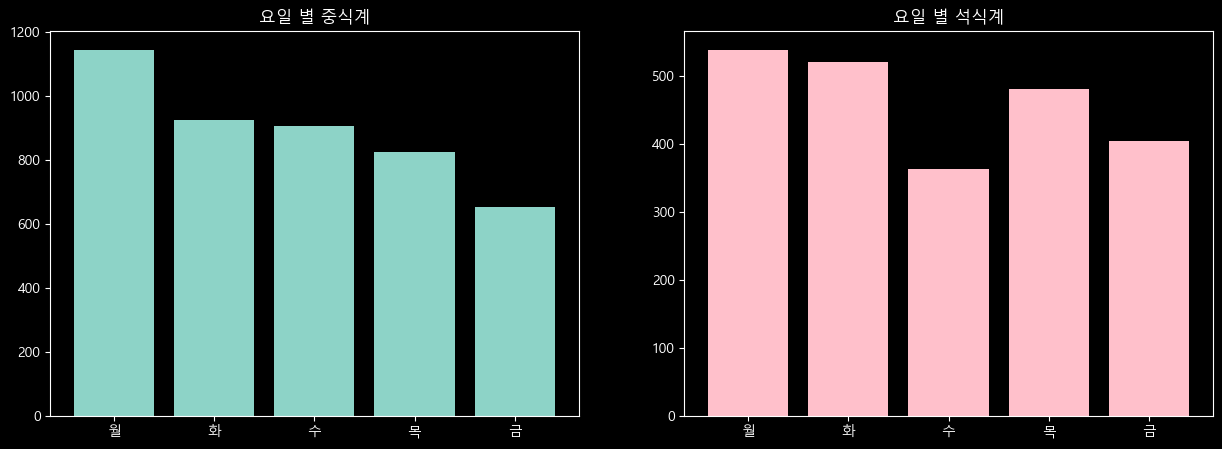

In [434]:
# 요일별 평균 식수(중식계)
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)   # 양 옆으로 그래프를 같이 띄우게끔 해주는 것
plt.title("요일 별 중식계")
plt.bar(df_day.index, df_day['중식계'])
# 주 초반에 중시계에 대한 식수가 많음을 관측 -> 원인 추론해보자면 -> 월요일에 보통 업무 정의, 미팅, 주간회의 등 일주일에 가장 바쁜 요일이기 때문이라고 생각됨!
# 주 후반에 중시계에 대한 식수가 감소됨을 확인 -> 금요일은 보통 연차를 이어붙이는 경우가 많아서 감소된 듯 함

# 요일별 평균 식수 확인(석식계)
plt.subplot(1, 2, 2)
plt.title("요일 별 석식계")
plt.bar(df_day.index, df_day['석식계'], color = "pink")
# 수요일에 식수가 감소함 -> 유추해 본 결과 -> 주중 중반의 수요일이라 많은 직원들이 피로를 느낄 수 있다고 생각됨

plt.show()

In [435]:
# 원본 데이터프레임 df
df.head()

#월별 평균 식수 확인

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0
3,2016-02-04,목,2601,104,220,355,0.0,"모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥 (쌀,닭:국내산) 근대국...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 ...","미니김밥*겨자장 (쌀,현미흑미:국내산) 우동 멕시칸샐러드 군고구마 무피클 포...",978.0,525.0
4,2016-02-05,금,2601,278,181,34,0.0,모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥 (쌀:국내산) 재첩국 방...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 차돌박이찌개 (쇠고기:호주산) 닭갈비 (닭고기:...",925.0,330.0


In [436]:
df['month'] = df['일자'].dt.month   # 월수(month)만 추출
df.head(3)

,일자,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,조식메뉴,중식메뉴,석식메뉴,중식계,석식계,month
0,2016-02-01,월,2601,50,150,238,0.0,모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥 (쌀:국내산) 된장찌개 쥐...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 육개장 자반고등어구이 두부조림 건파래무침 ...",1039.0,331.0,2
1,2016-02-02,화,2601,50,173,319,0.0,모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥 (쌀:국내산) 호박젓국찌...,"쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무...","콩나물밥*양념장 (쌀,현미흑미:국내산) 어묵국 유산슬 (쇠고기:호주산) 아삭고추무...",867.0,560.0,2
2,2016-02-03,수,2601,56,180,111,0.0,모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥 (쌀:국내산) 콩나물국...,"카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 ...","쌀밥/잡곡밥 (쌀,현미흑미:국내산) 청국장찌개 황태양념구이 (황태:러시아산) 고기...",1017.0,573.0,2


In [437]:
# 월별 평균 중식계, 석식계 식수 확인
df_month = df.groupby("month")[['중식계','석식계']].mean()
df_month

,중식계,석식계
month,,
1,934.247525,424.564356
2,989.623656,514.860215
3,953.607477,530.700935
4,883.621359,480.825243
5,869.787879,458.131313
6,863.311111,460.355556
7,848.736364,437.300000
8,854.785047,459.485981
9,907.148936,463.617021


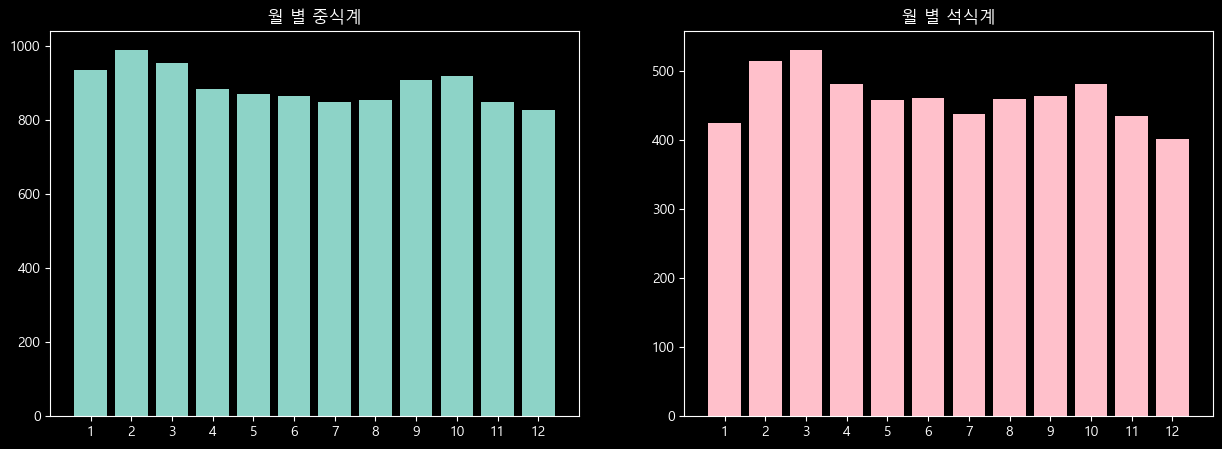

In [438]:
# 월 별 평균 식수 확인
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)   # 양 옆으로 그래프를 같이 띄우게끔 해주는 것
plt.title("월 별 중식계")
plt.bar(df_month.index, df_month['중식계'], label = "중식계")
plt.xticks(df_month.index)   # x축 숫자들 생략없이 출력됨

plt.subplot(1, 2, 2)
plt.title("월 별 석식계")
plt.bar(df_month.index, df_month['석식계'], color = "pink")
plt.xticks(df_month.index)

plt.show()

# 2, 3월은 높은 식수 -> 신입 사원 채용 증가, 신년 행사 등으로 식수 인원이 증가할 가능성으로 보임
# 4, 5, 6, 7, 8월은 휴가철이 영향을 끼쳐서 비교적 낮은 값을 보이는 듯함

# 전체적으로 봤을 때는 차이가 거의 나보이진 않음 -> 극단적으로 차이가 나는 경우 원을 분석 - 전략 수립 시 우선 제외

In [439]:
df['중식메뉴'][8]

'쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국 (쇠고기:호주산) 탕수어 (동태:러시아산) 오징어숙회무침  취나물  요구르트  포기김치 (김치:국내산) '

In [440]:
# 들쑥날쑥한 공백을 ❤로 변환 후 확인
df['중식메뉴'][8].replace(" ", "❤")

# => 공백으로는 나눠져 있는데, 2칸과 1칸으로 비균일하게 나누어져 있음

'쌀밥/잡곡밥❤(쌀:국내산)❤쇠고기무국❤(쇠고기:호주산)❤탕수어❤(동태:러시아산)❤오징어숙회무침❤❤취나물❤❤요구르트❤❤포기김치❤(김치:국내산)❤'

In [441]:
df["중식메뉴"][122].replace(" ", "❤")

'쌀밥/잡곡밥❤(쌀:국내산)❤부대찌개*라면사리❤❤갈치구이❤❤닭살겨자냉채❤❤꽈리고추찜❤❤포기김치❤(김치:국내산)❤❤❤'

In [442]:
# 3칸의 공백을 1칸의 공백으로 바꾸기 (중식메뉴 122)
df['조식메뉴'] = df['조식메뉴'].str.replace("   ", " ")
df['중식메뉴'] = df['중식메뉴'].str.replace("   ", " ")
df['석식메뉴'] = df['석식메뉴'].str.replace("   ", " ")


# " "으로 메뉴를 분리하기 위해서 공백 2칸을 공백 1칸으로 변경시키기
df['조식메뉴'] = df['조식메뉴'].str.replace("  ", " ")
df['중식메뉴'] = df['중식메뉴'].str.replace("  ", " ")
df['석식메뉴'] = df['석식메뉴'].str.replace("  ", " ")    # str : string 메서드
# => 공백 2칸을 공백 1칸으로 변경 

In [443]:
# 공백 확인하기
df['중식메뉴'][50].replace(" ", "❤")

'쌀밥/잡곡밥❤(쌀:국내산)❤배추된장국❤돈육강정❤콩나물잡채❤브로컬리두부무침❤포기김치❤(김치:국내산)❤'

In [444]:
df['조식메뉴'] = df['조식메뉴'].str.split(" ")
df['중식메뉴'] = df['중식메뉴'].str.split(" ")
df['석식메뉴'] = df['석식메뉴'].str.split(" ")
df["조식메뉴"]

0       [모닝롤/찐빵, 우유/두유/주스, 계란후라이, 호두죽/쌀밥, (쌀:국내산), 된장찌...
1       [모닝롤/단호박샌드, 우유/두유/주스, 계란후라이, 팥죽/쌀밥, (쌀:국내산), 호...
2       [모닝롤/베이글, 우유/두유/주스, 계란후라이, 표고버섯죽/쌀밥, (쌀:국내산), ...
3       [모닝롤/토마토샌드, 우유/두유/주스, 계란후라이, 닭죽/쌀밥, (쌀,닭:국내산),...
4       [모닝롤/와플, 우유/두유/주스, 계란후라이, 쇠고기죽/쌀밥, (쌀:국내산), 재첩...
                              ...                        
1200    [모닝롤/페퍼로니피자, 우유/주스, 계란후라이/찐계란, 크루통크림스프/흑미밥, 아귀...
1201    [모닝롤/생크림단팥빵, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 떡국, 해...
1202    [모닝롤/BLT샌드위치, 우유/주스, 계란후라이/찐계란, 흑임자죽/흑미밥, 바지락살...
1203    [모닝롤/호박고구마오븐구이, 우유/주스, 계란후라이/찐계란, 누룽지탕/흑미밥, 감자...
1204    [모닝롤/야채샌드, 우유/주스, 계란후라이/찐계란, 참치죽/흑미밥, 홍합탕, 애호박...
Name: 조식메뉴, Length: 1205, dtype: object

In [445]:
df["중식메뉴"][120]

['쌀밥/잡곡밥', '(쌀:국내산)', '꽃게탕', '훈제오리냉채', '동그랑땡전', '콩자반', '배추겉절이', '(김치:국내산)', '']

#### **공백을 기준으로 나눈 데이터 중 TR-IDF을 통해 main 메뉴 선정**
- 혼잡도에 영향을 미칠 것 같은 요소가 메인 메뉴라고 판단됨
- main 메뉴를 선정하기 위한 불필요한 (소괄호 안에 들어가 있는) 원산지 정보도 제거 

In [446]:
import re   # 정규표현식 라이브러리
from sklearn.feature_extraction.text import TfidfVectorizer   # TF-IDF 도구
# TF-IDF : 문서 내 단어의 빈도와 전체 문서에서의 희귀성을 반영하여 가중치를 계산하는 것

In [447]:
# 정규 표현식을 사용하여 문자열의 부분을 치환하는 함수
# (정규표현식 패턴 , 텍스트, 바꾸고자 하는 대상)  
re.sub(r"\([^)]*\)" , "" , df["중식메뉴"][120][1])

# r"" : 이스케이프 코드가 아님(사용하지 않겠다!)
# \( : 여는 괄호
# \) : 닫는 괄호
# [^)]* : 대괄호 안에 닫는 괄호를 제외(^)한 모든 문자 *(0번 이상 반복)를 의미 
# * : 모든 문자
# ^ : 부정

''

### **람다식과 정규표현식**
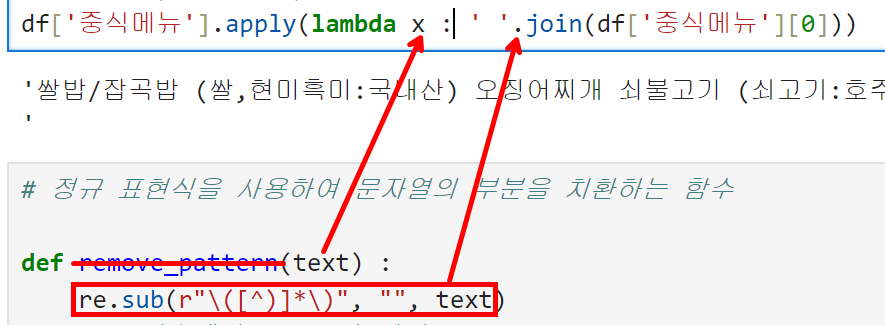

In [448]:
# 리스트를 문자열로 변환시켜 주기
# 익명함수(lambda 식) 활용 
df['조식메뉴'] = df['조식메뉴'].apply(lambda x : ' '.join(x))
df['중식메뉴'] = df['중식메뉴'].apply(lambda x : ' '.join(x))
df['석식메뉴'] = df['석식메뉴'].apply(lambda x : ' '.join(x))
# => 공백을 기준으로 join하면 다시 이어붙어진다
df['중식메뉴']

0       쌀밥/잡곡밥 (쌀,현미흑미:국내산) 오징어찌개 쇠불고기 (쇠고기:호주산) 계란찜 청...
1       쌀밥/잡곡밥 (쌀,현미흑미:국내산) 김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요...
2       카레덮밥 (쌀,현미흑미:국내산) 팽이장국 치킨핑거 (닭고기:국내산) 쫄면야채무침 견...
3       쌀밥/잡곡밥 (쌀,현미흑미:국내산) 쇠고기무국 주꾸미볶음 부추전 시금치나물 요구르트...
4       쌀밥/잡곡밥 (쌀,현미흑미:국내산) 떡국 돈육씨앗강정 (돼지고기:국내산) 우엉잡채 ...
                              ...                        
1200    쌀밥/흑미밥/찰현미밥 아욱국 수제함박스테이크 견과류마카로니범벅 생깻잎지 단호박물김치...
1201    쌀밥/수수밥/찰현미밥 냉이된장국 동파육 봄동전 청경채/버섯숙회*초장 무생채 양상추샐...
1202    전주비빔밥*약고추장 계란파국 요거닭 올방개묵무침 파프리카해초무침 포기김치 양상추샐러...
1203    쌀밥/흑미밥/찰현미밥 전주식콩나물해장국 돈육간장불고기 깐풍연근 연두부*달래양념장 봄...
1204    쌀밥/귀리밥/찰현미밥 들깨미역국 교촌간장치킨 옥수수콘치즈구이 가지고추장무침 포기김치...
Name: 중식메뉴, Length: 1205, dtype: object

In [449]:
def remove_pattern(text) :  # () 안에는 apply에 들어올 거 적어주기
    return re.sub(r"\([^)]*\)" , "", text)

In [450]:
df["조식메뉴"].apply(remove_pattern) , df["중식메뉴"].apply(remove_pattern) , df["석식메뉴"].apply(remove_pattern)
# => 원산지 깔끔하게 제거됨

(0         모닝롤/찐빵 우유/두유/주스 계란후라이 호두죽/쌀밥  된장찌개 쥐어채무침 포기김치  
 1       모닝롤/단호박샌드 우유/두유/주스 계란후라이 팥죽/쌀밥  호박젓국찌개 시래기조림 포...
 2       모닝롤/베이글 우유/두유/주스 계란후라이 표고버섯죽/쌀밥  콩나물국 느타리호박볶음 ...
 3         모닝롤/토마토샌드 우유/두유/주스 계란후라이 닭죽/쌀밥  근대국 멸치볶음 포기김치  
 4          모닝롤/와플 우유/두유/주스 계란후라이 쇠고기죽/쌀밥  재첩국 방풍나물 포기김치  
                               ...                        
 1200    모닝롤/페퍼로니피자 우유/주스 계란후라이/찐계란 크루통크림스프/흑미밥 아귀지리 마늘...
 1201    모닝롤/생크림단팥빵 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 떡국 해물땡굴소스볶...
 1202    모닝롤/BLT샌드위치 우유/주스 계란후라이/찐계란 흑임자죽/흑미밥 바지락살국 두부조...
 1203    모닝롤/호박고구마오븐구이 우유/주스 계란후라이/찐계란 누룽지탕/흑미밥 감자양파국 분...
 1204    모닝롤/야채샌드 우유/주스 계란후라이/찐계란 참치죽/흑미밥 홍합탕 애호박새우젓볶음 ...
 Name: 조식메뉴, Length: 1205, dtype: object,
 0               쌀밥/잡곡밥  오징어찌개 쇠불고기  계란찜 청포묵무침 요구르트 포기김치  
 1           쌀밥/잡곡밥  김치찌개 가자미튀김 모둠소세지구이 마늘쫑무침 요구르트 배추겉절이  
 2               카레덮밥  팽이장국 치킨핑거  쫄면야채무침 견과류조림 요구르트 포기김치  
 3               쌀밥/잡곡밥  쇠고기무국 주꾸미볶음 부추전 시금치나물 요구르트 포기김치  
 4               쌀밥/잡곡밥  떡국 돈육씨앗강정  우엉잡채 청경채무침 요구르트 포기김치  
              

#### **TR-IDF 활용하여 단어의 중요도 계산 해주고, 상위 1ea 메뉴만 선정해보기**

In [451]:
vectorizer = TfidfVectorizer()

In [452]:
X = vectorizer.fit_transform(df["중식메뉴"])

In [453]:
# X.toarray()를 DF로 형변환시키기
pd.DataFrame(X.toarray())

,0,1,2,3,4,5,6,7,8,9,...,1677,1678,1679,1680,1681,1682,1683,1684,1685,1686
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.214869,0.0,0.0,0.0,0.0
1201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1203,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.192451,0.0,0.0,0.0,0.0


In [454]:
# 출력
vectorizer.get_feature_names_out()

array(['d오리엔탈d', 'la갈비구이', 'new', ..., '흑임자드레싱', '흑임자연근샐러드', '히레카츠'],
      dtype=object)

In [455]:
# 가중치를 통해 단어의 중요도 확인(상위단어는 아직 안골랐음)
tfidf_df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

In [456]:
tfidf_df.head(3)

,d오리엔탈d,la갈비구이,new,가래떡구이,가래떡돼지갈비찜,가래떡츄러스,가자미무조림,가자미양념찜,가자미엿장구이,가자미엿장조림,...,훈제오리냉채,훈제오리단호박볶음,훈제오리마늘볶음,훈제오리볶음,흑미,흑미밥,흑임자d,흑임자드레싱,흑임자연근샐러드,히레카츠
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [457]:
# 상위 단어에 접근하기
top_n_idx = tfidf_df.iloc[70, : ].argmax()   
# iloc : 행 접근
# argmax() : 
# => 0번 째 행에서 가장 높은 값을 가진 인덱스 번호 출력
# => 각 메뉴별로 TF-IDF 점수가 가장 높은 1개의 단어 인덱스 추출

tfidf_df.columns[top_n_idx]
# => 각 메뉴별로 TF-IDF 점수가 가장 높은 1개의 메뉴 추출

'산채비빔밥'

In [458]:
# 위의 복잡한 알고리즘을 함수로 만들어 간단하게 적용하기
def extract_main(menu_series) :
    vectorizer = TfidfVectorizer()    
    X = vectorizer.fit_transform(menu_series)
    
    tfidf_df = pd.DataFrame(X.toarray(), columns = vectorizer.get_feature_names_out())

    # 각 행별로 TF-IDF 점수가 가장 높은 단어 추출
    # apply 함수
    def top_tfidf_word(row) :
        top_n_idx = row.argmax()  
        return tfidf_df.columns[top_n_idx]
        
    # 메인메뉴 apply 함수 적용시키기
    return tfidf_df.apply(top_tfidf_word, axis = 1)

In [459]:
df['조식메뉴_Main'] = extract_main(df["조식메뉴"])
df['중식메뉴_Main'] = extract_main(df["중식메뉴"])
df['석식메뉴_Main'] = extract_main(df["석식메뉴"])

In [460]:
df['조식메뉴_Main'] , df['중식메뉴_Main'] , df['석식메뉴_Main']

(0          쥐어채무침
 1          단호박샌드
 2        느타리호박볶음
 3            근대국
 4           방풍나물
           ...   
 1200       마늘종숙회
 1201      생크림단팥빵
 1202       바지락살국
 1203     분홍소세지구이
 1204    애호박새우젓볶음
 Name: 조식메뉴_Main, Length: 1205, dtype: object,
 0           오징어찌개
 1            김치찌개
 2           견과류조림
 3             부추전
 4          돈육씨앗강정
           ...    
 1200    견과류마카로니범벅
 1201         버섯숙회
 1202         계란파국
 1203          양념김
 1204       교촌간장치킨
 Name: 중식메뉴_Main, Length: 1205, dtype: object,
 0          건파래무침
 1           콩나물밥
 2             황태
 3           미니김밥
 4        감자소세지볶음
           ...   
 1200        맛살튀김
 1201     비엔나채소볶음
 1202    수제맛쵸킹탕수육
 1203         생강채
 1204      수제고기육전
 Name: 석식메뉴_Main, Length: 1205, dtype: object)

In [461]:
df["중식메뉴_Main"].value_counts()

중식메뉴_Main
유자청돈육볶음     5
견과류조림       5
new         5
참나물땅콩무침     4
사과고구마그라탕    4
           ..
도라지오이무침     1
매운닭찜        1
청양된장찌개      1
콩비지찌개       1
교촌간장치킨      1
Name: count, Length: 928, dtype: int64

### **Main data EDA**

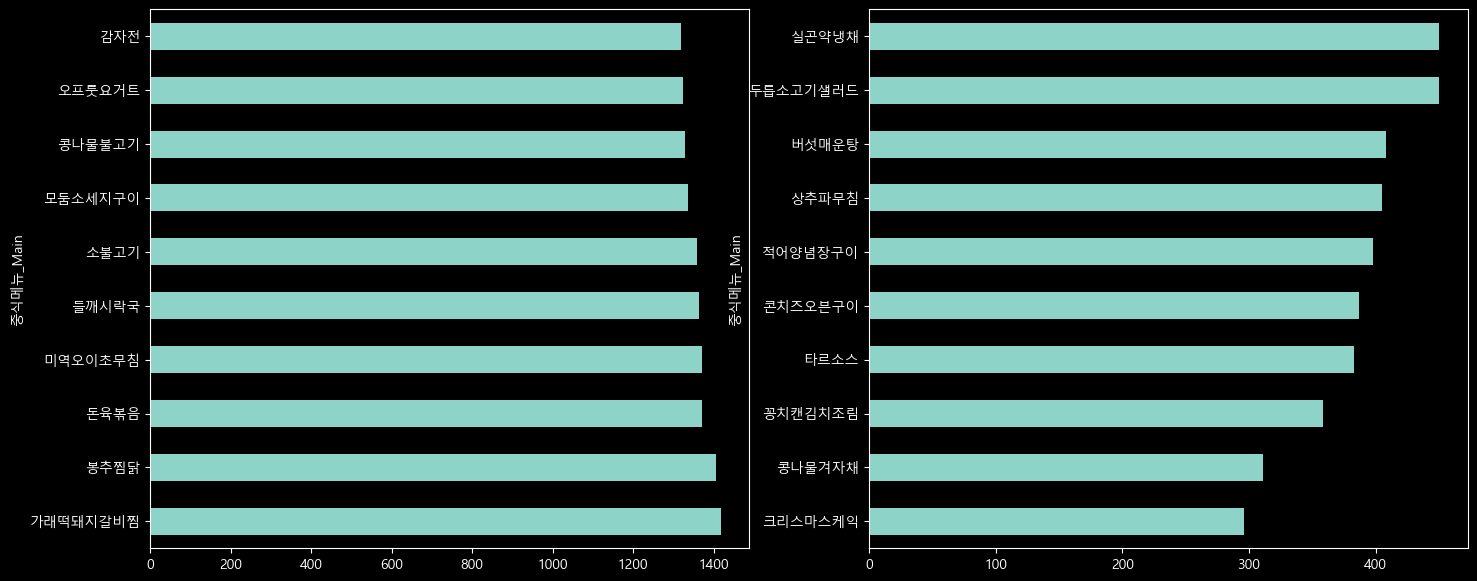

In [462]:
# main menu 별로 중식계 식수 인원 확인(평균값 확인)
df_lunch = df.groupby("중식메뉴_Main")['중식계'].mean()

plt.figure(figsize=(17, 7))
 # 인기 있는 메뉴 - 값을 기준해서 정렬하기(내림차순).상위 10개.그래프(가로)
plt.subplot(1, 2, 1)
df_lunch.sort_values(ascending = False).head(10).plot(kind = "barh")

# 인기 없는 메뉴 - 하위 10개 (방문객수가 현저히 떨어지고 있음)
plt.subplot(1, 2, 2)
df_lunch.sort_values(ascending = True).head(10).plot(kind = "barh")

plt.show()
# 내림차순으로 확인해 본 결과, 가래떡돼지갈비찜부터 맛있어보이는 메뉴들이 중식계 식수가 높음
# 오름차순으로 확인해 본 결과, 크리스마스 케잌이 가장 인기가 없음을 확인

# => 인기가 적은 Main 메뉴들은 재고를 적게 준비함과 동시에 보완책을 고려 해보거나, 
#    인기가 많은 Main 메뉴들은 재고가 떨어질 일이 없게끔 재고를 좀 더 준비 해보는 방안을 택 해볼 수 있겠다

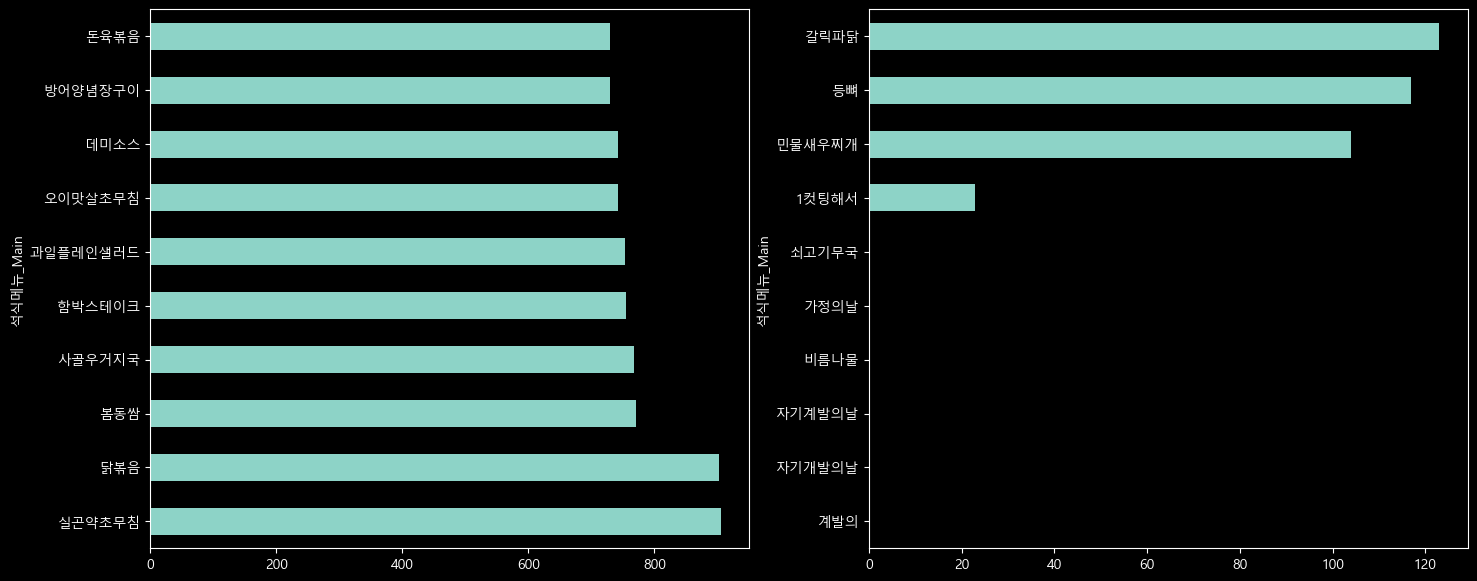

In [463]:
# main menu 별 석식계 식수 인원 확인(평균값 확인)
df_dinner = df.groupby("석식메뉴_Main")['석식계'].mean()

plt.figure(figsize=(17, 7))
 # 인기 있는 메뉴 - 값을 기준해서 정렬하기(내림차순).상위 10개.그래프(가로)
plt.subplot(1, 2, 1)
df_dinner.sort_values(ascending = False).head(10).plot(kind = "barh")

# 인기 없는 메뉴 - 하위 10개 (방문객수가 현저히 떨어지고 있음)
plt.subplot(1, 2, 2)
df_dinner.sort_values(ascending = True).head(10).plot(kind = "barh")

plt.show()

# 오름차순으로 확인해 본 결과, 메뉴가 아닌 것들도 관측됨(가정의날, 자기계발의날 등)

In [464]:
# 석식메뉴에서 석식계가 0인 데이터들 확인하기 (True)
df[df["석식계"] == 0]["석식메뉴"].value_counts()

석식메뉴
 *                                                      19
                                                         4
 자기계발의날                                                  3
 자기개발의날                                                  3
  *                                                      2
 * 자기계발의날 *                                              2
 * 자기개발의날 *                                              2
 자기계발의날                                                  1
 *자기계발의날*                                                1
 가정의날                                                    1
쌀밥/잡곡밥 (쌀:국내산) 된장찌개 미니함박조림 계란말이 비름나물 포기김치 (김치:국내산)       1
쌀밥/잡곡밥 (쌀:국내산) 쇠고기무국 고추잡채*꽃빵 계란찜 오이무침 포기김치 (김치:국내산)      1
 *                                                       1
 * 자기개발의날 *                                              1
 ＜자기 계발의 날＞                                              1
Name: count, dtype: int64

In [465]:
sum(df["석식계"] == 0)
# T = 1 , F = 0 ??
# 특정 이벤트나 활동일 때 석식이 제공되지 않았거나, 의도적으로 석식이 제공되지 않음을 나타낼 수도 있다고 관측됨
# 개수가 적기 때문에 삭제하기

43

In [466]:
# 0이 아닌 데이터 확인 (False) -> ! -> (True)
df["석식계"] != 0

0       True
1       True
2       True
3       True
4       True
        ... 
1200    True
1201    True
1202    True
1203    True
1204    True
Name: 석식계, Length: 1205, dtype: bool

In [467]:
# 석식계가 0인 행 제외
df = df[df["석식계"] != 0]
df.shape
# => 1205개에서 43개가 삭제된 1162개

(1162, 16)

In [468]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 0 to 1204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1162 non-null   datetime64[ns]
 1   요일              1162 non-null   object        
 2   본사정원수           1162 non-null   int64         
 3   본사휴가자수          1162 non-null   int64         
 4   본사출장자수          1162 non-null   int64         
 5   본사시간외근무명령서승인건수  1162 non-null   int64         
 6   현본사소속재택근무자수     1162 non-null   float64       
 7   조식메뉴            1162 non-null   object        
 8   중식메뉴            1162 non-null   object        
 9   석식메뉴            1162 non-null   object        
 10  중식계             1162 non-null   float64       
 11  석식계             1162 non-null   float64       
 12  month           1162 non-null   int32         
 13  조식메뉴_Main       1162 non-null   object        
 14  중식메뉴_Main       1162 non-null   object        
 15  석식메뉴_Main

## **K-means 군집**
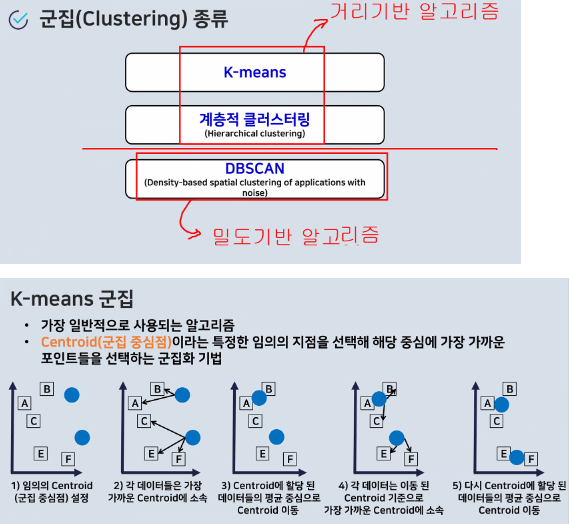

### **모델링을 위한 준비**
- 데이터 스케일링 수행
  - 거리기반, 수치기반 알고리즘들은 어느 정도 정규화(스케일링)가 필요함
- 범주형 데이티에 대한 인코딩 수행
  - sklearn에서 제공되는 모델들은 문자형을 입력값으로 허용치 않음

In [469]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 0 to 1204
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   일자              1162 non-null   datetime64[ns]
 1   요일              1162 non-null   object        
 2   본사정원수           1162 non-null   int64         
 3   본사휴가자수          1162 non-null   int64         
 4   본사출장자수          1162 non-null   int64         
 5   본사시간외근무명령서승인건수  1162 non-null   int64         
 6   현본사소속재택근무자수     1162 non-null   float64       
 7   조식메뉴            1162 non-null   object        
 8   중식메뉴            1162 non-null   object        
 9   석식메뉴            1162 non-null   object        
 10  중식계             1162 non-null   float64       
 11  석식계             1162 non-null   float64       
 12  month           1162 non-null   int32         
 13  조식메뉴_Main       1162 non-null   object        
 14  중식메뉴_Main       1162 non-null   object        
 15  석식메뉴_Main

In [470]:
# 불필요한 컬럼 삭제
df.drop(columns = ['일자', '조식메뉴', '중식메뉴', '석식메뉴'], inplace = True)

In [471]:
df.shape

(1162, 12)

In [472]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1162 entries, 0 to 1204
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   요일              1162 non-null   object 
 1   본사정원수           1162 non-null   int64  
 2   본사휴가자수          1162 non-null   int64  
 3   본사출장자수          1162 non-null   int64  
 4   본사시간외근무명령서승인건수  1162 non-null   int64  
 5   현본사소속재택근무자수     1162 non-null   float64
 6   중식계             1162 non-null   float64
 7   석식계             1162 non-null   float64
 8   month           1162 non-null   int32  
 9   조식메뉴_Main       1162 non-null   object 
 10  중식메뉴_Main       1162 non-null   object 
 11  석식메뉴_Main       1162 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 113.5+ KB


In [473]:
df['요일'].dtype == 'O' , df['month'].dtype == 'O'

(True, False)

In [474]:
# 수치형, 범주형 컬럼 나누기
numeric_list = []
categorical_list = []

for i in df.columns : 
    if df[i].dtype == 'O' :   # Object형 이니?
        # Object형인 경우
        categorical_list.append(i)
    else :
        # Object형이 아닌 경우
        numeric_list.append(i)

print(categorical_list)
print(numeric_list)

['요일', '조식메뉴_Main', '중식메뉴_Main', '석식메뉴_Main']
['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', '중식계', '석식계', 'month']


In [475]:
# 수치형 데이터 다중인덱싱
df[numeric_list]
# 수치형 데이터 -> 스케일링 필요

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,month
0,2601,50,150,238,0.0,1039.0,331.0,2
1,2601,50,173,319,0.0,867.0,560.0,2
2,2601,56,180,111,0.0,1017.0,573.0,2
3,2601,104,220,355,0.0,978.0,525.0,2
4,2601,278,181,34,0.0,925.0,330.0,2
...,...,...,...,...,...,...,...,...
1200,2983,75,198,4,391.0,1093.0,421.0,1
1201,2983,92,231,462,351.0,832.0,353.0,1
1202,2983,255,248,1,303.0,579.0,217.0,1
1203,2983,107,153,616,327.0,1145.0,502.0,1


In [476]:
# 범주형 데이터 
df[categorical_list]
# 범주형 데이터 -> 인코딩 필요

,요일,조식메뉴_Main,중식메뉴_Main,석식메뉴_Main
0,월,쥐어채무침,오징어찌개,건파래무침
1,화,단호박샌드,김치찌개,콩나물밥
2,수,느타리호박볶음,견과류조림,황태
3,목,근대국,부추전,미니김밥
4,금,방풍나물,돈육씨앗강정,감자소세지볶음
...,...,...,...,...
1200,수,마늘종숙회,견과류마카로니범벅,맛살튀김
1201,목,생크림단팥빵,버섯숙회,비엔나채소볶음
1202,금,바지락살국,계란파국,수제맛쵸킹탕수육
1203,월,분홍소세지구이,양념김,생강채


#### **스케일링 적용**
- 스케일러 선택을 위한 데이터 분포 확인
- StandardScaler : 정규 분포 시 적용
  - 평균이 0, 표준편차가 1이 되도록 변환
- MinMaxScaler : 비정규 분포 시 적용
  - 0 ~ 1 사이의 값(기본값)으로 변환

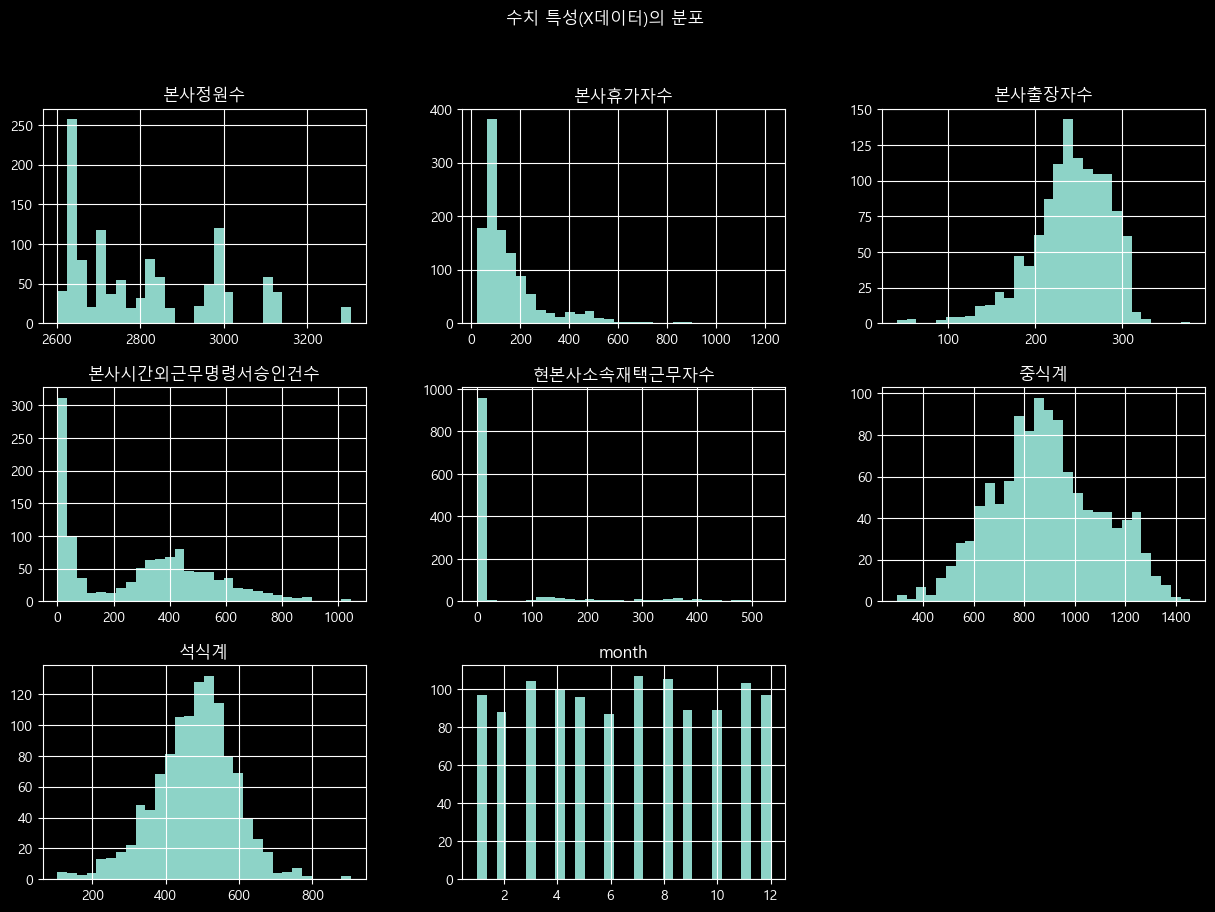

In [477]:
# 분포 확인을 위한 히스토그램 그려보기
# 정규분포인지 비정규분포인지 확인하고 싶을 때(hist())
df[numeric_list].hist(
    bins = 30,   # 히스토그램의 막대 개수 30개로 설정
    figsize = (15, 10)   # 행열 크기 설정
)

# 각각의 차트에 대한 큰 제목 설정하기
plt.suptitle("수치 특성(X데이터)의 분포")
plt.show()

# => 정규 분포 : 중식계나 석식계 같은 그래프
# => 비정규 분포 : 본사정원수(빈도수도 다른 그래프들 보다 높음 2600-3400)
# => + 본사휴가자수, 본사시간외근무명령서승인건수, 현본사소속재택근무자수, month
# => 비대칭 분포 : skewd - 본사휴가자수, 본사시간외근무명령서승인건수, 현본사소속재택근무자수

In [478]:
# 앞서 본 데이터 분포를 고려할 때, 대부분의 특성들이 정규 분포를 따르지 않는 경향이 관측됨
# MinMaxScaler 선택

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# DF(원본데이터) 복사
# df_scaled = df        # 얕은 복사 -> 주소값 공유 -> 복사본 데이터를 바꾸면, 원본 데이터도 바뀜(주소값만 복사됨)
df_scaled = df.copy()   # 강한 복사 -> 주소값을 따로따로 데이터 자체를 복사(새로운 데이터를 만듦) - 진짜 복사

# 수치형 데이터만 스케일링 적용시키기 - 0과 1로 맞춰서 모든 비율값을 맞추겠다!
df_scaled[numeric_list] = scaler.fit_transform(df_scaled[numeric_list])

In [479]:
df_scaled[numeric_list]

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,month
0,0.000000,0.022481,0.323442,0.227969,0.000000,0.638865,0.283396,0.090909
1,0.000000,0.022481,0.391691,0.305556,0.000000,0.490972,0.569288,0.090909
2,0.000000,0.027477,0.412463,0.106322,0.000000,0.619948,0.585518,0.090909
3,0.000000,0.067444,0.531157,0.340038,0.000000,0.586414,0.525593,0.090909
4,0.000000,0.212323,0.415430,0.032567,0.000000,0.540843,0.282147,0.090909
...,...,...,...,...,...,...,...,...
1200,0.542614,0.043297,0.465875,0.003831,0.733583,0.685297,0.395755,0.000000
1201,0.542614,0.057452,0.563798,0.442529,0.658537,0.460877,0.310861,0.000000
1202,0.542614,0.193172,0.614243,0.000958,0.568480,0.243336,0.141074,0.000000
1203,0.542614,0.069942,0.332344,0.590038,0.613508,0.730009,0.496879,0.000000


### **상관관계 히트맵**
- 각 컬럼끼리 선형 관계가 얼마나 짙은지를 나타내는 차트
- -1 ~ 1 
  - 0에 가까울수록 비선형관계
  - -1에 가까울수록 반비례적인 관계
  - 1에 가까울수록 비례적인 관계

In [480]:
# !pip install -U seaborn

In [481]:
import seaborn as sns
plt.rcParams["axes.unicode_minus"] = False   # '-' 기호를 차트에 표현
sns.__version__

'0.13.2'

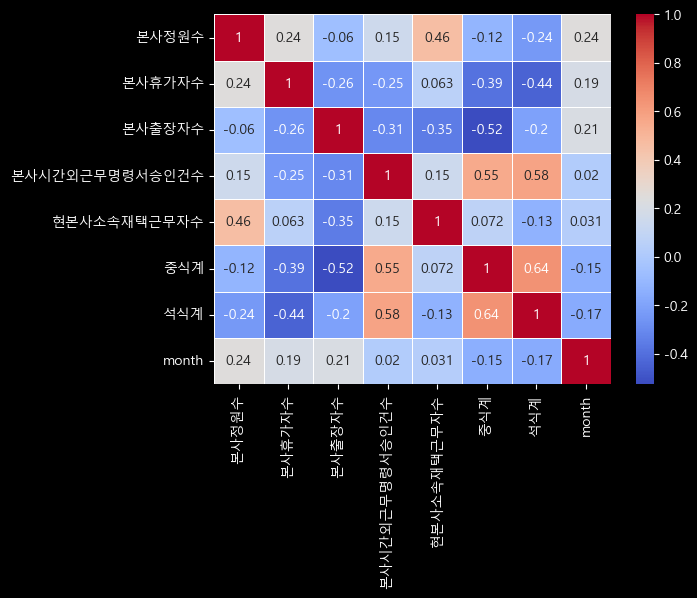

In [482]:
# 상관관계도
corr_matrix = df_scaled.corr(numeric_only = True)

# corr_matrix = df_scaled[numeric_list].corr() # 상관계수 계산

#히트맵 그리기
sns.heatmap(
    corr_matrix,        # 히트맵 그릴 상관 행렬
    annot = True,       # 각 셀에 상관계수 값을 표시 여부
    cmap = "coolwarm",  # 색상 맵(파랑-빨강)
    linewidths = 0.5    # 셀끼리의 경계선 두께
)
plt.show()

# 석식계 , 본사 휴가자수의 관계 : -0.44(음의 상관관계) -> 휴가자가 많을수록 , 석식 인원이 줄어드는 경향이 나타남
# 석식계 , 본사시간외근무명령서승인건수 : 0.58(양의 상관관계) -> 야근이 많으면 많을수록 , 석식 인원이 늘어나는 경향을 나타냄
# 추후에는 month 같은 스케일링으로 인해 의미를 잃는 컬럼은 별도의 처리(삭제 , 범주형에서 인코딩 등)가 필요해보임 ..!

- **인코딩 적용**
- label : 값의 높고 낮음이 의미가 있을 때
- one_hot : 값의 높고 낮음이 의미가 없을 때 때

In [483]:
categorical_list

['요일', '조식메뉴_Main', '중식메뉴_Main', '석식메뉴_Main']

In [484]:
df_scaled["요일"].value_counts()

요일
목    244
월    241
화    239
금    239
수    199
Name: count, dtype: int64

In [485]:
# "요일"이라는 컬럼에 대해서만 원핫 인코딩 수행
df_scaled = pd.get_dummies(df_scaled , columns = ['요일'])

In [486]:
# MainMenu에 대해서도 고유값 카운팅 확인
df_scaled["중식메뉴_Main"].value_counts()

# 메뉴들에 대해서 원핫인코딩을 적용할 경우 , 차원이 크게 증가됨!

중식메뉴_Main
견과류조림      5
new        5
유자청돈육볶음    5
참나물땅콩무침    4
해파리겨자채     4
          ..
콩나물파채      1
개성감자만두     1
사골떡국       1
도라지오이무침    1
교촌간장치킨     1
Name: count, Length: 902, dtype: int64

#### **빈도 인코딩(Frequency Encoding)**
- 각 범주를 해당 범주의 빈도로 대체 ( 단점 : 빈도가 같을 때 구분이 어려움! )

In [487]:
categorical_list[1: ]

['조식메뉴_Main', '중식메뉴_Main', '석식메뉴_Main']

In [488]:
# map()에 들어갈 인자값 만들기! (딕셔너리 형)
# map({old:new})
df_scaled["조식메뉴_Main"].value_counts().to_dict()

{'연두부탕': 8,
 '김잔파무침': 8,
 '도라지나물': 8,
 '문어꽈리초조림': 7,
 '브로컬리들깨찜': 7,
 '쇠고기무국': 7,
 '느타리볶음': 7,
 '대구찌개': 7,
 '대구매운탕': 7,
 '두부쑥갓무침': 7,
 '쑥갓두부무침': 7,
 '마늘쫑볶음': 6,
 '무생채': 6,
 '대구탕': 6,
 '시래기국': 6,
 '꽈리고추찜': 6,
 '선지해장국': 6,
 '재첩국': 6,
 '브로컬리죽': 6,
 '미역국': 6,
 '매운버섯국': 6,
 '열무나물': 6,
 '핫케익': 6,
 '조랭이떡국': 6,
 '땅콩조림': 6,
 '김치국': 5,
 '된장찌개': 5,
 '아욱국': 5,
 '건새우아욱국': 5,
 '차돌박이찌개': 5,
 '오이무침': 5,
 '노각무침': 5,
 '김치두부국': 5,
 '두부젓국찌개': 5,
 '콩나물김치국': 5,
 '콩나물무침': 5,
 '어묵볶음': 5,
 '감자조림': 5,
 '느타리호박볶음': 5,
 '참치야채죽': 5,
 '고구마순나물': 5,
 '홍합탕': 5,
 '삶은계란': 5,
 '맑은만두육개장': 5,
 '단배추나물': 5,
 '동전쥐포무침': 5,
 '올챙이만두국': 5,
 '배추된장국': 5,
 '브로컬리초장': 5,
 '북어국': 5,
 '연두부국': 5,
 '비름나물': 4,
 '우거지해장국': 4,
 '동태찌개': 4,
 '마늘쫑건새우볶음': 4,
 '새송이볶음': 4,
 '콩자반': 4,
 '시금치핫케익': 4,
 '두부양념조림': 4,
 '새송이버섯볶음': 4,
 '팬케익': 4,
 '중국': 4,
 '북어계란국': 4,
 '인절미샌드': 4,
 '구운계란': 4,
 '피바지락국': 4,
 '청포묵무침': 4,
 '동태탕': 4,
 '북어해장국': 4,
 '미역나물': 4,
 '시금치국': 4,
 '진미채볶음': 4,
 '영양부추생채': 4,
 '올갱이아욱국': 4,
 '치킨샌드': 4,
 '마늘쫑무침': 4,
 '두부김치국': 4,
 '롤케익': 4,
 '유채나

In [489]:
# 빈도 인코딩 적용
for column in categorical_list[1:] :
    map_dict = df_scaled[column].value_counts().to_dict()             # map()에 넣을 인자값 딕셔너리 생성
    df_scaled[f"{column}_encoded"] = df_scaled[column].map(map_dict)  # 각 빈도수별로 요소를 바꿔주고 encoded 컬럼을 추가

In [490]:
df_scaled["중식메뉴_Main_encoded"]

0       1
1       3
2       5
3       2
4       1
       ..
1200    1
1201    1
1202    1
1203    1
1204    1
Name: 중식메뉴_Main_encoded, Length: 1162, dtype: int64

In [491]:
df_encoded = df_scaled.drop(columns = categorical_list[1:])
df_encoded

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,month,요일_금,요일_목,요일_수,요일_월,요일_화,조식메뉴_Main_encoded,중식메뉴_Main_encoded,석식메뉴_Main_encoded
0,0.000000,0.022481,0.323442,0.227969,0.000000,0.638865,0.283396,0.090909,False,False,False,True,False,1,1,3
1,0.000000,0.022481,0.391691,0.305556,0.000000,0.490972,0.569288,0.090909,False,False,False,False,True,4,3,3
2,0.000000,0.027477,0.412463,0.106322,0.000000,0.619948,0.585518,0.090909,False,False,True,False,False,5,5,1
3,0.000000,0.067444,0.531157,0.340038,0.000000,0.586414,0.525593,0.090909,False,True,False,False,False,2,2,1
4,0.000000,0.212323,0.415430,0.032567,0.000000,0.540843,0.282147,0.090909,True,False,False,False,False,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0.542614,0.043297,0.465875,0.003831,0.733583,0.685297,0.395755,0.000000,False,False,True,False,False,1,1,1
1201,0.542614,0.057452,0.563798,0.442529,0.658537,0.460877,0.310861,0.000000,False,True,False,False,False,1,1,1
1202,0.542614,0.193172,0.614243,0.000958,0.568480,0.243336,0.141074,0.000000,True,False,False,False,False,1,1,1
1203,0.542614,0.069942,0.332344,0.590038,0.613508,0.730009,0.496879,0.000000,False,False,False,True,False,1,1,1


### **K-Means 알고리즘**
- 비슷한 샘플끼리 거리 기반으로 군집 형성

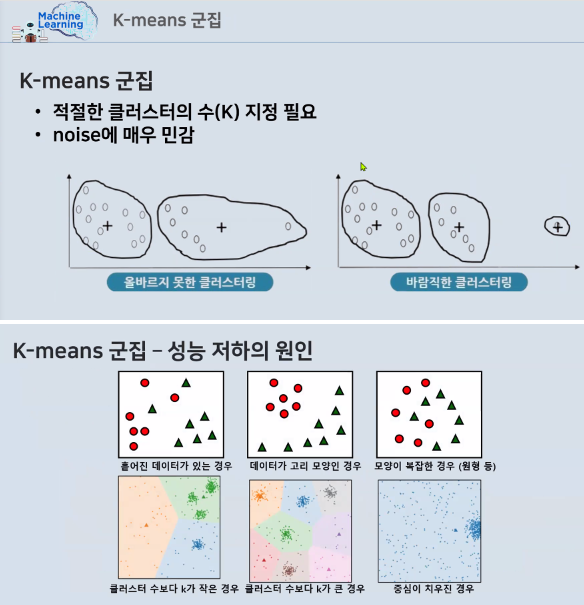

In [492]:
# 머신러닝 교육 , 시각화를 위한 도구
# !pip install mglearn

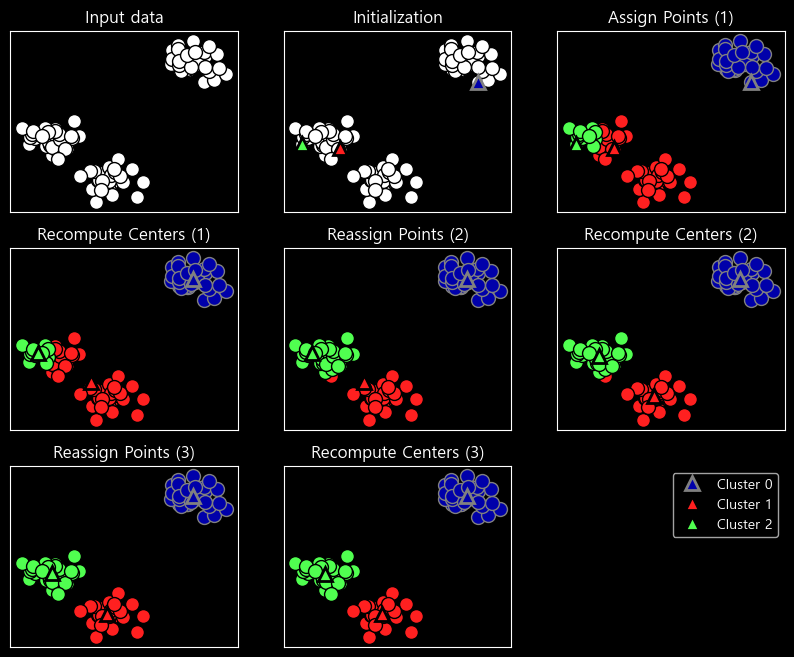

In [493]:
import mglearn
mglearn.plots.plot_kmeans_algorithm()

# 1. 임의로 Centroid 선정
# 2. Centroid로부터 가까운 데이터 포인트 선정
# 3. 선정한 데이터 포인트들의 평균 중심점으로 Centroid를 이동
# 4. 2~3단계 반복 후 수렴(Centroid의 이동이 더 이상 없을 때)
# 장점 : 결과물에 대해서 이해하기 쉬움, 효율적임
# 단점 : 노이즈데이터에 매우 민감

In [494]:
# pip list

In [495]:
# 모델 초기화
from sklearn.cluster import KMeans
model = KMeans(
    n_clusters = 3,       # 클러스터의 수 설정
    n_init = 10,          # 초기 centroid를 무작위로 선택하는 횟수를 설정 , 가장 괜찮은 (군집이 잘 나뉘었는가?) 결과를 선택
    random_state = 2024   # 시드 고정
)

In [496]:
# 학습
model.fit(df_encoded)

KMeans(n_clusters=3, n_init=10, random_state=2024)

In [497]:
# 예측
pd.Series(model.predict(df_encoded)).value_counts()

0    515
2    353
1    294
Name: count, dtype: int64

### **최적의 K수 (클러스터 수)를 결정하기 위한 3가지 방법**

#### **1. Elbow method(관성과 군집수, 엘보우 기법)**

In [498]:
model.inertia_
# SSE , 군집화를 수행하고 나서 , 각 centroid에서 군집내 데이터 간의 거리를 합산한 것

3274.9960275137887

In [499]:
# Elbow Method 시각화

# 클러스터 범위 설정
ks = range(1,31)

In [500]:
# 각 k수에 대해 KMean 학습시킨 후 SSE를 계산
k_means = [KMeans(n_init = 10 , n_clusters = k , random_state = 2024).fit(df_encoded) for k in ks]

In [501]:
inertias = [model.inertia_ for model in k_means]

In [502]:
inertias

[7345.872299401456,
 3983.688254481782,
 3274.9960275137896,
 2997.220305534853,
 2751.0126908790844,
 2522.385709104215,
 2403.4039569336387,
 2271.9124373613545,
 2211.4825765089586,
 2122.063542407681,
 2020.9803598668502,
 1944.3406709703406,
 1913.1967612238702,
 1810.5871425290743,
 1776.0766994952505,
 1703.3294809384315,
 1631.3759792862554,
 1628.0538924930147,
 1550.1318902647035,
 1507.729194485059,
 1496.7008669617744,
 1463.3141345521612,
 1424.68989279373,
 1414.8031124969623,
 1399.9709061155397,
 1335.773909682217,
 1329.6929205992044,
 1302.8361155201362,
 1297.9008905875703,
 1269.3826261216661]

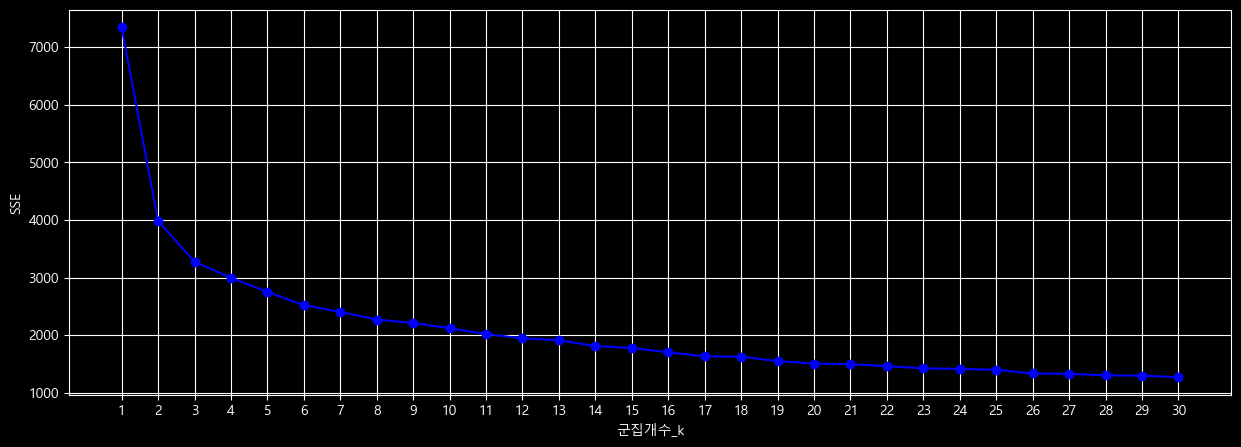

In [503]:
# 엘보우 차트
plt.figure(figsize = (15,5))
plt.plot(ks , inertias , "bo-")   # bo- : 파란색 점과 선
plt.xlabel("군집개수_k")
plt.xticks(ks)
plt.ylabel("SSE")   # 군집 내에 데이터 간의 거리를 합산한 것
plt.grid()
plt.show()

# 엘보우 포인트 : 차트에서 SSE의 감소율이 급격히 줄어드는 지점
# 2, 3에서 엘보우 포인트로 관측 됨

#### **2. 실루엣 점수(silhouette score)**
- 얼마나 효율적으로 잘 분리되었는지를 나타냄 (분리도 , 응집도)
- 1에 가까울 수록 잘 나눴다!
- 0에 가까울 수록 애매함!
- -1에 가까울수록 잘못 군집화 되었거나 , 데이터 셋이 클러스터링을 할 수 없는(거리기반에 한해서) 데이터셋

In [504]:
# 전체 데이터에 대한 평균 실루엣 계수를 계산해주는 도구
from sklearn.metrics import silhouette_score 

In [505]:
# 학습한 데이터셋에 대한 예측값
k_means[6].labels_ 

array([5, 6, 6, ..., 2, 2, 2])

In [506]:
# 문제데이터 , 예측값
silhouette_score(df_encoded , k_means[6].labels_) 

0.18632675032515406

In [507]:
# 각 클러스터 개수에 따른 실루엣 점수를 계산(2 ~ 9)
sil_scores = [silhouette_score(df_encoded,model.labels_) for model in k_means[1:]]

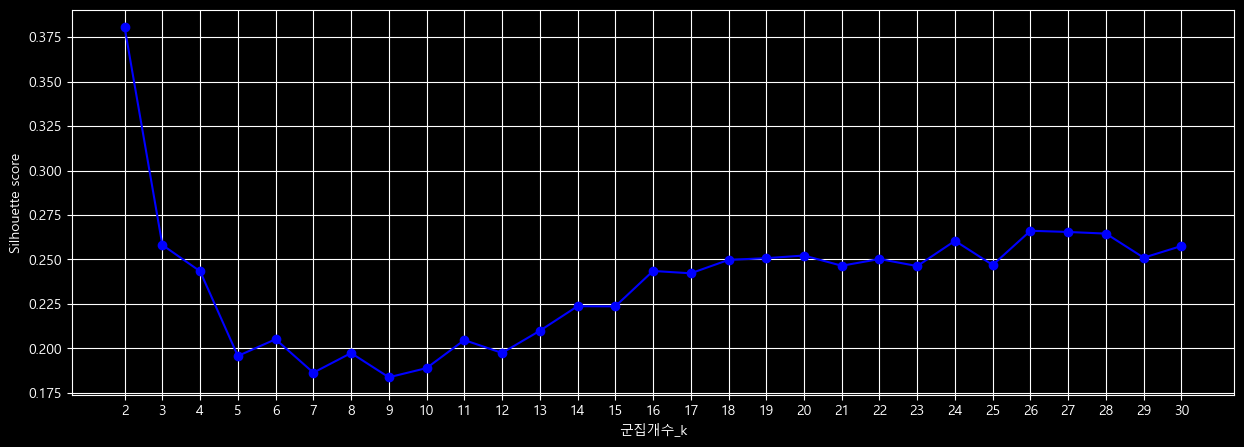

In [508]:
plt.figure(figsize = (15,5))
plt.plot(ks[1:] , sil_scores , "bo-")   # bo- : 파란색 점과 선
plt.xlabel("군집개수_k")
plt.xticks(ks[1:])
plt.ylabel("Silhouette score")   # 평균 실루엣 계수 
plt.grid()
plt.show()

# 실루엣 점수를 기반으로 적절한 k수 선정하는 장법 : 가장 높은 게 잘 클러스터링 했다라고 판단해볼 수 있음
# 최적의 클러스터 수는 2로 될 가능성이 커보임

# => 2,3번 째까지가 군집이 가장 적절
# => 4 ~ 10 은 적절하지 않음

#### **3. 실루엣 다이어그램과 군집수**
- 군집별로 각 샘플에 대한 실루엣 계수를 오름차순으로 정렬한 후 , 실루엣 다이어그램을 그려서 확인
---
- 눈금 위치 지정자 `FixedLocator`와 눈금 형식 지정자 `FixedFormatter`는 지정된 위치에 원하는 눈금을 작성할 때 사용됨
- 자세한 사용법은 아래 링크를 참고
- 눈금 위치 지정자: https://matplotlib.org/stable/gallery/ticks/tick-locators.html
- 눈금 형식 지정자: https://matplotlib.org/stable/gallery/ticks/tick-formatters.html

In [509]:
import numpy as np

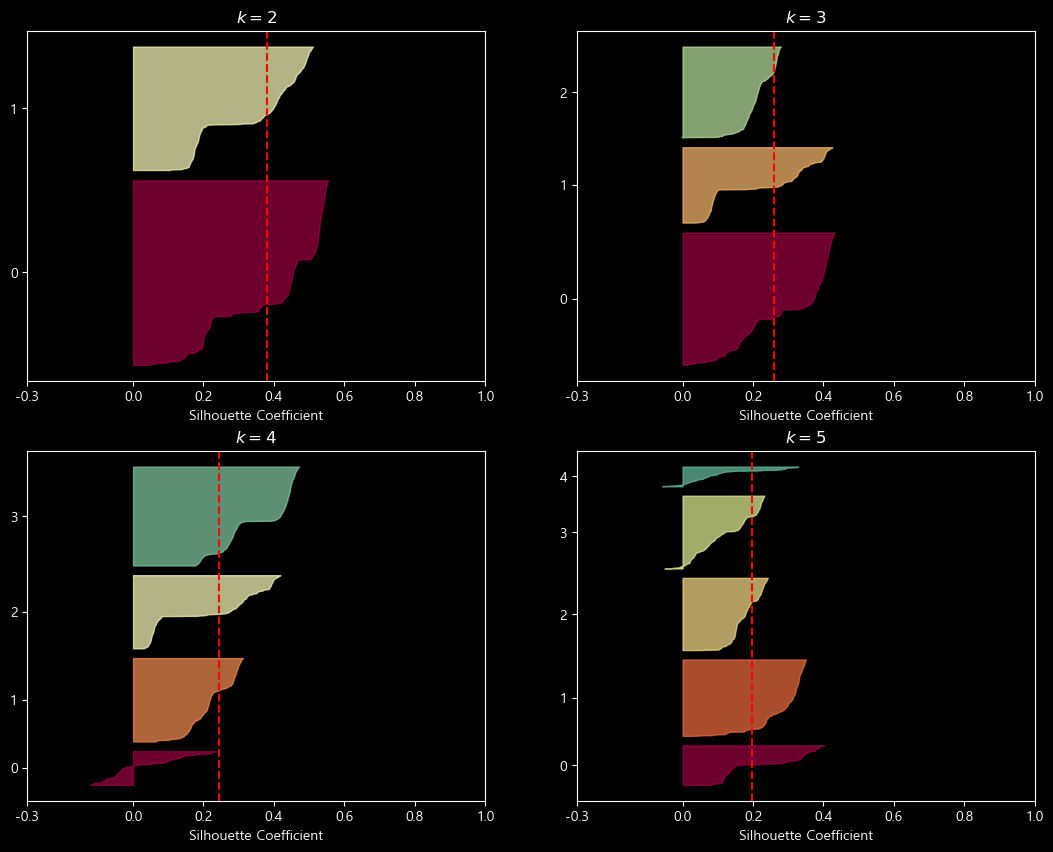

In [510]:
from sklearn.metrics import silhouette_samples   # 각 데이터 포인트의 실루엣 계수를 반환
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(13, 10))

for k in (2, 3, 4, 5):         # 2 ~ 5 군집의 다이어그램을 그리기
    plt.subplot(2, 2, k - 1)   # 2행 2열의 k-1번쨰 영역에 그래프를 그리기

    y_pred = k_means[k - 1].labels_   # k번째 군집의 라벨
    
    silhouette_coefficients = silhouette_samples(df_encoded, y_pred)   # 실루엣 계수
    
    padding = len(df_encoded) // 30   # 칼날 간격
    pos = padding                     # 칼날 위치
    ticks = []                        # y축 눈금 위치
    
    # 군집별로 실루엣 계수 그리기
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = plt.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding
        
    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter([str(i) for i in range(k)]))
    plt.gca().set_xticks([-0.3, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.xlabel("Silhouette Coefficient")
    plt.axvline(x=sil_scores[k - 2], color="red", linestyle="--")   # 평균값을 빨강색 파선 그려주기
    plt.title(f"$k={k}$")

    plt.xticks([-0.3, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

# 각 그래프는 k수에 따른 실루엣 계수의 분포를 보여줌
# 실루엣 칼날 : 각 군집에 속하는 데이터 포인트의 실루엣 계수 분포를 나타냄
# 빨간색 파션(점선) : 평균 실루엣 계수
# 실루엣 계수는 데이터 포인트가 자신의 군집과 얼마나 밀접하게 관련되어 있는지와 다른 군집과 얼마나 떨어져 있는지를 나타내는 척도이다.

# xtick에서 1에 가까울수록 잘 나눳다! 라고 판단할 수 있는데 , 
# k = 2로 성장했을 때가 가장 잘 나눴다라고 관측해볼 수 있음!
# k = 4 처럼 0 이하로 떨어졌을 때는 -1에 가까울수록 잘못 군집화 되었거나 , 데이터 셋이 클러스터링을 할 수 없는(거리기반에 한해서) 데이터셋

- **추가 : Dendrogram 확인을 통한 k 수 찾아보기!**

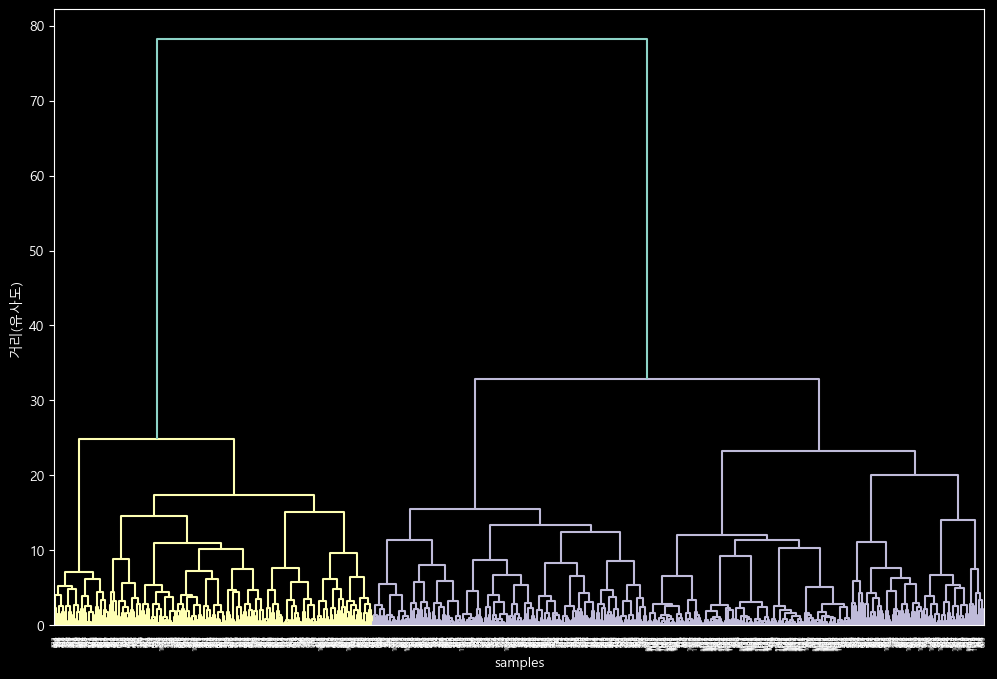

In [511]:
import scipy.cluster.hierarchy as shc   # 병합 군집을 위한 도구
# scipy : 검정 도구

plt.figure(figsize = (12,8))
shc.dendrogram(shc.linkage(df_encoded , method = 'ward'))   # 병합 군집을 수행하여 덴드로그램을 그림 , 
# method = 'ward' 계산법 종류 중 1개 , 클러스터 내 분신(얼마나 퍼져있는지)를 가장 적게 증가시키는 두 클러스터를 합침 

plt.xlabel("samples")
plt.ylabel("거리(유사도)")
plt.show()

# 가지수 하나하나가 군집개수?라고 하셨나..

#### **적절한 k수는 2로 판단됨** ( k = 2가 정답은 아니다! )
- k = 3도 고려해볼 수는 있음 => 최적의 k수를 찾는 지표값들이 절대적인 값은 아님
- 클러스터링 이후, 각 클러스터링의 특성을 이해하고 클러스터별로 재고 관리 전략을 수립하는 것이 중요하다!

In [512]:
# 최적의 k수로 모델 초기화
model = KMeans(n_clusters = 2, n_init = 10, random_state = 2024)
#                   (개수 ,     반복횟수 ,     난수 고정 숫자)

In [513]:
# 학습하며 예측 수행
kmean_pred = model.fit_predict(df_encoded)
kmean_pred

array([0, 1, 1, ..., 0, 0, 0])

In [514]:
np.unique(kmean_pred)

array([0, 1])

In [515]:
pd.Series(kmean_pred).value_counts()
# => 데이터 포인트 별로 나눠진 걸로 나타남

0    696
1    466
Name: count, dtype: int64

In [516]:
# 예측한 클러스터링 결과를 컬럼으로 추가
df_encoded["cluster"] = kmean_pred

In [517]:
df_encoded

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,month,요일_금,요일_목,요일_수,요일_월,요일_화,조식메뉴_Main_encoded,중식메뉴_Main_encoded,석식메뉴_Main_encoded,cluster
0,0.000000,0.022481,0.323442,0.227969,0.000000,0.638865,0.283396,0.090909,False,False,False,True,False,1,1,3,0
1,0.000000,0.022481,0.391691,0.305556,0.000000,0.490972,0.569288,0.090909,False,False,False,False,True,4,3,3,1
2,0.000000,0.027477,0.412463,0.106322,0.000000,0.619948,0.585518,0.090909,False,False,True,False,False,5,5,1,1
3,0.000000,0.067444,0.531157,0.340038,0.000000,0.586414,0.525593,0.090909,False,True,False,False,False,2,2,1,0
4,0.000000,0.212323,0.415430,0.032567,0.000000,0.540843,0.282147,0.090909,True,False,False,False,False,4,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0.542614,0.043297,0.465875,0.003831,0.733583,0.685297,0.395755,0.000000,False,False,True,False,False,1,1,1,0
1201,0.542614,0.057452,0.563798,0.442529,0.658537,0.460877,0.310861,0.000000,False,True,False,False,False,1,1,1,0
1202,0.542614,0.193172,0.614243,0.000958,0.568480,0.243336,0.141074,0.000000,True,False,False,False,False,1,1,1,0
1203,0.542614,0.069942,0.332344,0.590038,0.613508,0.730009,0.496879,0.000000,False,False,False,True,False,1,1,1,0


In [518]:
# 전체 평균값 보기
df_encoded.groupby("cluster").mean()
# => 조식메뉴 평균 차이 큼

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,month,요일_금,요일_목,요일_수,요일_월,요일_화,조식메뉴_Main_encoded,중식메뉴_Main_encoded,석식메뉴_Main_encoded
cluster,,,,,,,,,,,,,,,,
0,0.340848,0.117850,0.583517,0.278796,0.131666,0.510531,0.457300,0.507184,0.199713,0.212644,0.188218,0.202586,0.196839,1.750000,1.484195,1.452586
1,0.225362,0.105949,0.606105,0.262331,0.012859,0.514230,0.483958,0.491416,0.214592,0.206009,0.145923,0.214592,0.218884,5.206009,1.684549,1.624464


In [519]:
df_encoded["조식메뉴_Main_encoded"].value_counts()
# => 메뉴의 출연빈도수가 많이 나올 수록 빈도수가 적다

조식메뉴_Main_encoded
1    354
3    180
4    172
2    162
5    130
6     84
7     56
8     24
Name: count, dtype: int64

In [520]:
# cluster 별로 메뉴들을 확인하기 위해서, 원본 데이터(데이터프레임)에 불리언 인덱싱 수행
df[df_encoded["cluster"] == 0]["조식메뉴_Main"].value_counts()

조식메뉴_Main
닭개장         3
두부조림        3
핫도그         3
감자채볶음       3
조랭이미역국      3
           ..
러시아         1
열무된장나물      1
땅콩크림빵       1
참치야채        1
애호박새우젓볶음    1
Name: count, Length: 495, dtype: int64

In [521]:
df_cluster_0 = df[df_encoded["cluster"] == 0].copy()   # copy함수를 써서 얕은 복사 방지
df_cluster_1 = df[df_encoded["cluster"] == 1].copy()

In [522]:
df_cluster_0["중식메뉴_Main"].value_counts()

중식메뉴_Main
new        5
유자청돈육볶음    5
오이냉국       3
주꾸미초무침     3
맛살냉채       3
          ..
세발나물무침     1
유자청제육볶음    1
명태코다리강정    1
오징어돈육볶음    1
교촌간장치킨     1
Name: count, Length: 610, dtype: int64

In [523]:
df_cluster_1["중식메뉴_Main"].value_counts()

중식메뉴_Main
옥수수계란찜      3
참치야채전       3
차돌된장찌개      3
카레감자채볶음     3
치커리유자청무침    3
           ..
얼갈이된장무침     1
영양부추생채      1
모둠버섯구이      1
갈치조림        1
콩나물잡채       1
Name: count, Length: 382, dtype: int64

In [524]:
df_cluster_0["요일"].value_counts()

요일
목    148
월    141
금    139
화    137
수    131
Name: count, dtype: int64

In [525]:
df_cluster_1["요일"].value_counts()

요일
화    102
금    100
월    100
목     96
수     68
Name: count, dtype: int64

In [526]:
df_cluster_0.groupby("요일")[["중식계", "석식계"]].mean().T

요일,금,목,수,월,화
중식계,644.431655,825.283784,907.022901,1149.361702,924.569343
석식계,390.460432,473.851351,426.610687,541.404255,516.051095


In [527]:
df_cluster_1.groupby("요일")[["중식계", "석식계"]].mean().T

# 요일별로 중식계, 석식계 확인해 본 결과, 맨 처음에 봤던 bar 차트와 변반 달라보이진 않음
#   => 클러스터링을 한 의미가 없다

# 클러스터링의 목적 - 얼마나 잘 나누는가가 중요함

요일,금,목,수,월,화
중식계,665.21,822.0,916.705882,1137.24,932.686275
석식계,433.26,490.5,456.147059,535.45,530.705882


#### **KMeans 장단점**
##### **+ 기타 거리기반 클러스터링 포함**
- 장점
  - 구현과 이해가 쉬움
  - 해석하기도 쉬움
  - 군집이 잘 형성되어 있는 데이터셋이라고 한다면, 효율적임
- 단점
  - 적절한 k수를 찾아야 함 => 여러가지 분석적 접근이 필요함
  - Centroid를 중심으로 클러스터링을 수행하기 때문에 구형 클러스터는 잘 찾으나, 복잡한 모양의 클러스터(ex. 원형, 도넛, 고리 모양 등)을 처리하기에는 어려움
  - 이상치에 매우 민감하여 잘못된 클러스터링이 수행될 수도 있음
---
- 실루엣 점수(약 0.3 정도)가 낮았는데, 이는 군집이 수월하게 잘 되지 않았음을 의미함
    - 이상치 or 거리기반 알고리즘의 한계 등을 원인으로 유추해볼 수 있음

### **DBSCAN(Density-based spatial clustering of applications with noise)**
- 밀도 기반 알고리즘
- 밀도있게 연결되어 있는 데이터 집합은 동일한 클러스터로 판단

#### **밀도기반**
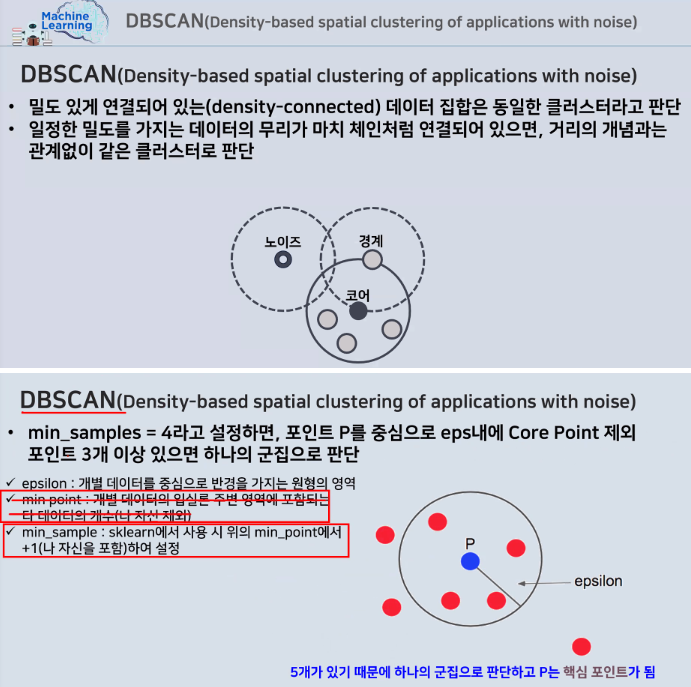

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


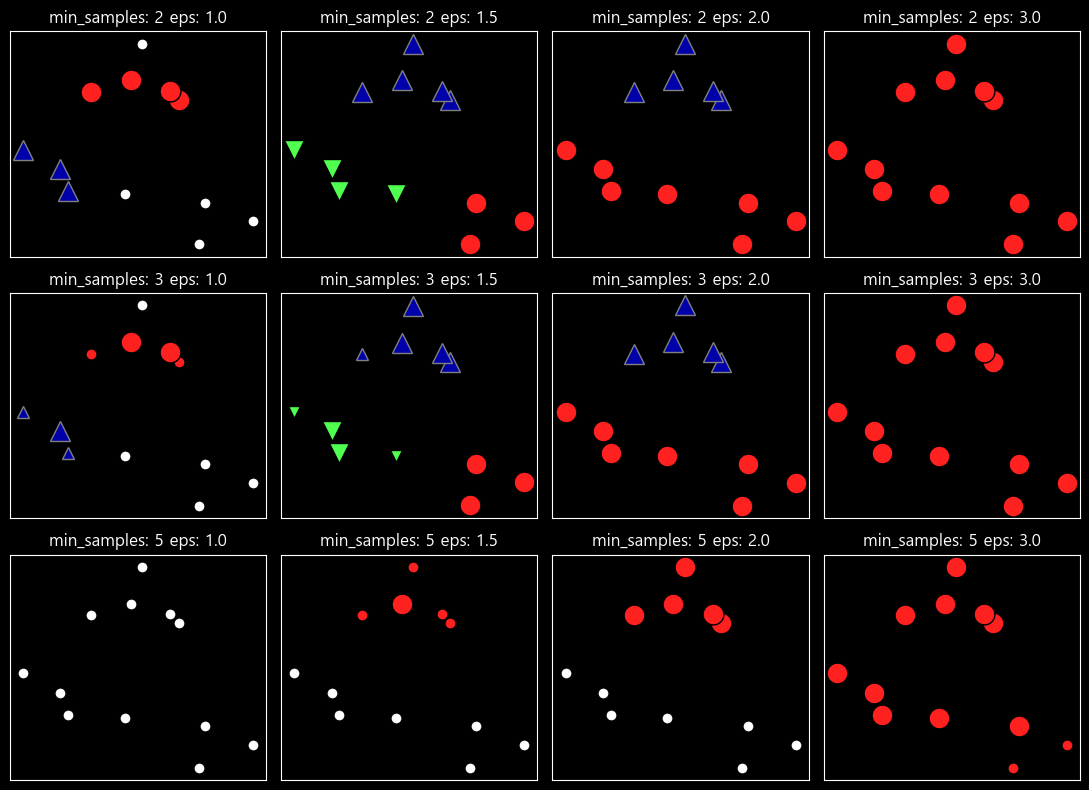

In [528]:
mglearn.plots.plot_dbscan()
plt.show()

#### **밀도 기반에 필요한 데이터**
- eps(epsilon) : 개별 데이터 포인트를 중심으로 반경을 가지는 원형의 영역(반지름) , core point가 되기 위한 반경
- min_samples : eps 반경 내에 나 자신까지 포함되는 데이터의 개수 , core point가 되기 위한 조건
- core point(중심포인트) : eps 반경 내에 충분한 min_samples의 데이터 포인트가 있는 데이터 포인트를 의미함
- border point(경계포인트) : eps 반경 내에 충분한 min_samples를 갖지 못하고, core point에 속해있는 데이터 포인트를 의미함
- noise point : core나 border point가 아닌 이외의 데이터 포인트들을 의미함( 밀집되지 못한 데이터 포인트 )<br/>
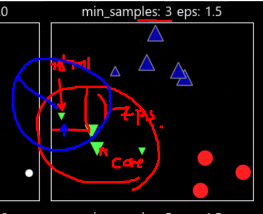
---
- eps을 증가시킬수록 하나의 클러스터에 더 많은 데이터 포인트가 포함 => 클러스터의 개수가 줄어들게 됨
- min_samples를 증가시킬수록 중심포인트가 줄어들며, noise point가 늘어남

In [529]:
df_encoded.drop(columns = ["cluster"], inplace = True)
# DBSCAN 모데링 시, kmeans의 label이 영향을 줄 수 있으므로 삭제

In [530]:
df_encoded

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,month,요일_금,요일_목,요일_수,요일_월,요일_화,조식메뉴_Main_encoded,중식메뉴_Main_encoded,석식메뉴_Main_encoded
0,0.000000,0.022481,0.323442,0.227969,0.000000,0.638865,0.283396,0.090909,False,False,False,True,False,1,1,3
1,0.000000,0.022481,0.391691,0.305556,0.000000,0.490972,0.569288,0.090909,False,False,False,False,True,4,3,3
2,0.000000,0.027477,0.412463,0.106322,0.000000,0.619948,0.585518,0.090909,False,False,True,False,False,5,5,1
3,0.000000,0.067444,0.531157,0.340038,0.000000,0.586414,0.525593,0.090909,False,True,False,False,False,2,2,1
4,0.000000,0.212323,0.415430,0.032567,0.000000,0.540843,0.282147,0.090909,True,False,False,False,False,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,0.542614,0.043297,0.465875,0.003831,0.733583,0.685297,0.395755,0.000000,False,False,True,False,False,1,1,1
1201,0.542614,0.057452,0.563798,0.442529,0.658537,0.460877,0.310861,0.000000,False,True,False,False,False,1,1,1
1202,0.542614,0.193172,0.614243,0.000958,0.568480,0.243336,0.141074,0.000000,True,False,False,False,False,1,1,1
1203,0.542614,0.069942,0.332344,0.590038,0.613508,0.730009,0.496879,0.000000,False,False,False,True,False,1,1,1


In [531]:
# 도구 불러오기
from sklearn.cluster import DBSCAN

In [532]:
# 모델 초기화
dbscan = DBSCAN(eps = 0.5, min_samples = 5)

In [533]:
dbscan_cluster = dbscan.fit_predict(df_encoded)
dbscan_cluster

array([-1, -1, -1, ..., 16, 39, 35], dtype=int64)

In [534]:
np.unique(dbscan_cluster)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44], dtype=int64)

In [535]:
# pd.Series(dbscan_cluster).value_counts()
len(pd.Series(dbscan_cluster).value_counts())

# => dbscan에서의 -1 label : 현재 noise point로 간주하고 있는 데이터 포인트를 의미함
# 45ea의 label이 형성됨을 확인
# 적절한 eps, min_samples의 설정이 필요함

46

### **DBCAN에서의 적절한 하이퍼파라미터 값 찾아보기**
- 이론적으로 증명된 DBSCAN의 min_samples나 eps을 구할 수 있는 공식이나 객관적인 통계량 같은 게 없음
- min_samples와 eps을 결정하는데 도움을 받을 수 있는 다양한 논문에 의해 주관적인 경험적 방법은 존재함
---
1. 많은 사용자들이 일반적인 경험에 의한 min_point(나 자신을 제외한 데이터 포인트 개수) 값 설정하는 방법
   - 데이터 포인트 개수(n)를 기반으로 찾아진 방법
   - 특성이 2개 이하인 경우 : 보통 min_point를 4 or 5로 설정
   - 특성이 3개 이상인 경우 : min_point = ceil(log(n)) → 로그를 취해서 올림한 값
   - 결과값에 +1을 수행한 값이 min_samples의 최적의 하이퍼파라미터라고 판단
     - min_samples : 나 자신을 포함한 데이터 포인트 개수
2. 많은 사용자들이 일반적인 경험에 의한 eps 값 설정
   - 각 데이터 포인트와 k번 째 가장 가까운 이웃 사이의 거리를 계산
   - k-dist polt을 그려서 Elbow 포인트 찾기 → 적절한 eps 값!

In [536]:
import math   # 수학 관련 라이브러리( math 안에 올림이 있음 )

In [537]:
# min_samples 설정
len(df_encoded)   # n

# 데이터 포인트  개수 담아주기
n = len(df_encoded)
# 넘퍼이에 로그 함수 들어가있음
np.log(n)
# 전체 데이터 포인트 수의 로그 값을 올림하여 최소 샘플 수를 결정
min_point = math.ceil(np.log(n))
min_point   # core point가 되기위한 기준

# np.log() : log 계산
# ceil() : 올림
# min_point = 8 => min_samples는 나 자신을 포함한 조건이므로 +1 -> 9로 채택

8

#### **k-거리(dist) plot 그려보기**

In [538]:
from sklearn.neighbors import NearestNeighbors
# KNN : 거리 계산을 통해 분류나 회귀 작업(예측)을 수행하도록 설계된 지도 모델
# NN(NearestNeighbors) : 데이터 포인트의 가까운 이웃을 찾기 위한 거리 계산하는 비지도 모델 - 거리값 계산하는 함수

In [539]:
# min_point 개수의 이웃을 찾기 위한 객체 생성
neighbors = NearestNeighbors(n_neighbors = min_point)

# 학습
neighbors_fit = neighbors.fit(df_encoded)

In [540]:
distences, i = neighbors_fit.kneighbors(df_encoded)
# distences : 각 데이터 포인트와 가장 가까운 주변 8개(min_point) 간의 거리값
# i : 해당되는 데이터 포인트의 인덱스

In [541]:
distences[3]

array([0.        , 0.16279939, 0.28338684, 0.42495203, 0.47609008,
       0.47748661, 0.50115696, 0.62705135])

In [542]:
i[3]

array([  3, 273, 282, 933, 105, 777, 110, 800], dtype=int64)

In [543]:
# 거리를 오름차순으로 정렬
distences = np.sort(distences, axis=0)   # 행 방향으로 설정

In [544]:
# distences[3]
distences[:, min_point-1]
# k-dist plot에 y축은 min_point 번 째 이웃 거리값을 설정하게 됨(가장 거리가 먼 데이터 포인트)

array([0.24004167, 0.25151012, 0.2551981 , ..., 2.44612584, 2.51759243,
       2.74038575])

In [545]:
distences = distences[:, min_point-1]

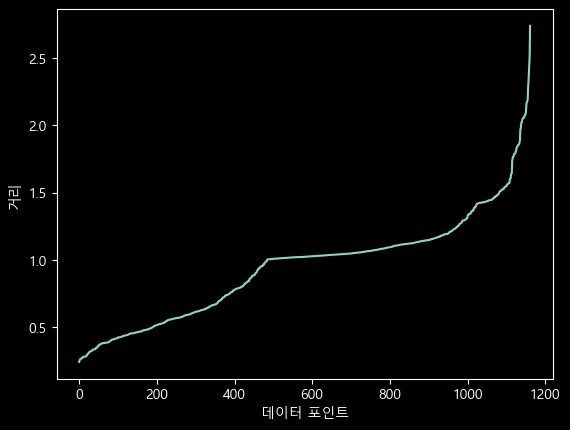

In [546]:
# k-dist plot 그려보기
plt.plot(distences)
# 차트 꾸미기
plt.xlabel("데이터 포인트")
plt.ylabel("거리")   # min_point -1번 째 ??
plt.show()

# 엘보우 포인트 : 그래프에서 급격한 변화가 일어나는 지점 선정
# 1, 2번 째 엘보우 포인트 : eps은 1.0 , 1.45로 급격한 변화가 보이는 것이 관측됨

#### **다시 DBSCAN 모델링**

In [547]:
# 다시 모델 초기화
dbscan = DBSCAN(eps = 1.4, min_samples = (min_point + 1))

In [548]:
dbscan

DBSCAN(eps=1.4, min_samples=9)

In [549]:
# 학습하면서 반환하는 값은 dbscan_cluster 넣어줌
dbscan_cluster = dbscan.fit_predict(df_encoded)
dbscan_cluster

array([ 2,  3, -1, ...,  1,  2,  3], dtype=int64)

In [550]:
pd.Series(dbscan_cluster).value_counts()
# => noise가 60정도 보임

 0    233
 3    232
 1    230
 2    225
 4    182
-1     60
Name: count, dtype: int64

In [551]:
# 클러스터링 결과 추가
df_encoded["dbscan_cluster"] = dbscan_cluster

In [552]:
df_encoded.head(3)

,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,month,요일_금,요일_목,요일_수,요일_월,요일_화,조식메뉴_Main_encoded,중식메뉴_Main_encoded,석식메뉴_Main_encoded,dbscan_cluster
0,0.0,0.022481,0.323442,0.227969,0.0,0.638865,0.283396,0.090909,False,False,False,True,False,1,1,3,2
1,0.0,0.022481,0.391691,0.305556,0.0,0.490972,0.569288,0.090909,False,False,False,False,True,4,3,3,3
2,0.0,0.027477,0.412463,0.106322,0.0,0.619948,0.585518,0.090909,False,False,True,False,False,5,5,1,-1


### **DBSCAN의 특징**
- 비선형 클러스터를 잘 찾아낼 수 있음
- 하이퍼 파라미터(eps, min_samples) 설정에 민감 -> 클러스터의 모양이나 크기에 상관없이 효과적으로 클러스터를 찾을 수 있음
- noise 포인트를 감지할 수 있음

In [553]:
# noise point 확인
df[df_encoded["dbscan_cluster"] == -1]

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,month,조식메뉴_Main,중식메뉴_Main,석식메뉴_Main
2,수,2601,56,180,111,0.0,1017.0,573.0,2,느타리호박볶음,견과류조림,황태
19,목,2624,61,224,351,0.0,1000.0,473.0,3,가지볶음,새송이버섯조림,군고구마
38,수,2624,48,230,0,0.0,1033.0,463.0,3,참나물무침,봄새싹비빔밥,애호박나물
119,수,2643,299,192,0,0.0,872.0,423.0,7,브로컬리들깨찜,오이도라지무침,모둠버섯볶음
158,월,2769,70,224,494,0.0,1185.0,710.0,9,미역줄기볶음,유자청돈육볶음,무채맑은국
165,목,2670,56,245,378,0.0,1196.0,352.0,10,구구마순나물,새송이전,군만두
184,수,2689,73,231,0,0.0,1006.0,540.0,11,대구찌개,부추겉절이,얼갈이겉절이
219,수,2705,72,230,0,0.0,929.0,494.0,12,쇠고기매운국,마늘간장치킨,도라지초무침
236,금,2697,191,247,62,0.0,791.0,533.0,1,무채나물,짬뽕국,애호박나물
240,목,2697,93,236,334,0.0,866.0,499.0,1,브로컬리무침,유자청돈육볶음,펜네베이컨샐러드


In [554]:
# noise 데이터 삭제
df_clean = df[df_encoded["dbscan_cluster"] != -1]   # 원본데이터 확인을 위해서 같이 noise data 제거
df_encoded_clean = df_encoded[df_encoded["dbscan_cluster"] != -1]   # DBSCAN 재학습을 위한 noise data 제거

In [555]:
df_clean.shape, df_encoded_clean.shape

((1102, 12), (1102, 17))

In [556]:
# 클러스터링 재시도
dbscan = DBSCAN(eps = 1.4, min_samples = (min_point + 1))    # 다시 모델 초기화
dbscan_cluster_clean = dbscan.fit_predict(df_encoded_clean)  # noise point 제거된 상태에서 다시 모델링 재시도

In [557]:
pd.Series(dbscan_cluster_clean).value_counts()

0    233
3    232
1    230
2    225
4    182
Name: count, dtype: int64

In [558]:
df_clean[dbscan_cluster_clean == 4]   # 클러스터 별 인덱싱하는 방법
# => 해당 클러스터에 속한 데이터 프레임이 나옴

,요일,본사정원수,본사휴가자수,본사출장자수,본사시간외근무명령서승인건수,현본사소속재택근무자수,중식계,석식계,month,조식메뉴_Main,중식메뉴_Main,석식메뉴_Main
9,수,2601,78,250,23,0.0,916.0,588.0,2,무생채,냉이된장국,자장소스
14,수,2601,54,232,14,0.0,1022.0,514.0,2,애호박나물,맛탕,멸치호두볶음
18,수,2624,127,182,261,0.0,1127.0,631.0,3,올갱이아욱국,맛살계란말이,콩나물겨자채
23,수,2624,43,225,0,0.0,901.0,523.0,3,롤케익,홍어무침,야채계란찜
28,수,2624,50,213,0,0.0,998.0,531.0,3,느타리호박볶음,두부계란부침,버섯메밀전
...,...,...,...,...,...,...,...,...,...,...,...,...
1176,수,2990,199,191,2,419.0,994.0,384.0,12,대구지리,치즈계란찜,메추리알꽈리고추조림
1181,수,2990,195,187,1,359.0,1135.0,450.0,12,매콤사태찜,가자미무조림,물파래초무침
1190,수,2983,85,156,11,433.0,1014.0,377.0,1,군대리아,꽁치한마리레몬구이,단무지채무침
1195,수,2983,80,175,8,393.0,913.0,360.0,1,매운사태조림,돈육두루치기,산고추지무침


In [559]:
len(np.unique(dbscan_cluster_clean))

5

In [560]:
# 딕셔너리 만들기 : {key값 : value값}
# test = {'cluster_4':df_clean[dbscan_cluster_clean == 4]}
# test['cluster_4']

# 클러스터 별 데이터 추출
clusters = {}
for i in range(len(np.unique(dbscan_cluster_clean))) :   # i => 0 ~ 4
    # i번 째 클러스터링 데이터를 각각의 키값으로 추가
    clusters[f"cluster_{i}"] = df_clean[dbscan_cluster_clean == i]   

In [561]:
# 클러스터 별 범주형(문자형) 데이터 통계 확인
for i, data in clusters.items() :
    print(f"{i} 범주형 통계치 :")
    display(data.describe(include='object').T)
    # 요일 별로 클러스터링이 수행됨을 확인

cluster_0 범주형 통계치 :


,count,unique,top,freq
요일,233,1,목,233
조식메뉴_Main,233,186,삶은계란,5
중식메뉴_Main,233,223,카레감자채볶음,3
석식메뉴_Main,233,210,옛날왕돈까스,3


cluster_1 범주형 통계치 :


,count,unique,top,freq
요일,230,1,금,230
조식메뉴_Main,230,181,우거지해장국,3
중식메뉴_Main,230,212,브로컬리맛살볶음,2
석식메뉴_Main,230,213,미니함박조림,3


cluster_2 범주형 통계치 :


,count,unique,top,freq
요일,225,1,월,225
조식메뉴_Main,225,174,핫케익,5
중식메뉴_Main,225,196,김치콩나물국,3
석식메뉴_Main,225,212,땅콩조림,3


cluster_3 범주형 통계치 :


,count,unique,top,freq
요일,232,1,화,232
조식메뉴_Main,232,187,느타리볶음,4
중식메뉴_Main,232,214,김치찌개,3
석식메뉴_Main,232,205,고구마그라탕,3


cluster_4 범주형 통계치 :


,count,unique,top,freq
요일,182,1,수,182
조식메뉴_Main,182,154,대구매운탕,4
중식메뉴_Main,182,174,산채비빔밥,3
석식메뉴_Main,182,168,근대국,3


In [562]:
# 클러스터 별 수치형 데이터 통계 확인
for i, data in clusters.items() :
    print(f"{i} 수치형 통계치 :")
    display(data.describe().T)
# cluster_1, cluster_4 : 시간 외 근무 명령서 승인 건수가 비교적 적음
# cluster_1 : 휴가 지수가 비교적 많음 + 중식계 인원 적응

cluster_0 수치형 통계치 :


,count,mean,std,min,25%,50%,75%,max
본사정원수,233.0,2805.403433,170.680763,2601.0,2645.0,2760.0,2962.0,3305.0
본사휴가자수,233.0,136.133047,133.928617,36.0,69.0,90.0,132.0,1224.0
본사출장자수,233.0,256.274678,39.679015,41.0,241.0,265.0,282.0,315.0
본사시간외근무명령서승인건수,233.0,381.412017,145.573516,24.0,305.0,364.0,452.0,1017.0
현본사소속재택근무자수,233.0,42.957082,108.754183,0.0,0.0,0.0,0.0,511.0
중식계,233.0,821.218884,124.377343,311.0,753.0,820.0,893.0,1214.0
석식계,233.0,482.888412,85.694855,117.0,443.0,489.0,531.0,743.0
month,233.0,6.467811,3.439131,1.0,4.0,6.0,9.0,12.0


cluster_1 수치형 통계치 :


,count,mean,std,min,25%,50%,75%,max
본사정원수,230.0,2811.617391,173.726085,2601.0,2648.00,2761.5,2962.00,3305.0
본사휴가자수,230.0,247.373913,140.268081,83.0,165.25,200.0,263.25,1026.0
본사출장자수,230.0,273.613043,33.061182,127.0,261.00,283.5,296.00,327.0
본사시간외근무명령서승인건수,230.0,38.604348,44.756351,0.0,1.00,40.5,60.75,428.0
현본사소속재택근무자수,230.0,39.060870,96.741251,0.0,0.00,0.0,0.00,462.0
중식계,230.0,651.286957,122.994498,387.0,570.50,644.0,722.00,1215.0
석식계,230.0,406.604348,97.418760,171.0,350.00,409.5,472.00,755.0
month,230.0,6.560870,3.423938,1.0,4.00,7.0,9.00,12.0


cluster_2 수치형 통계치 :


,count,mean,std,min,25%,50%,75%,max
본사정원수,225.0,2809.537778,171.136327,2601.0,2645.0,2760.0,2962.0,3305.0
본사휴가자수,225.0,168.760000,168.708368,49.0,93.0,112.0,157.0,1113.0
본사출장자수,225.0,203.968889,33.953801,53.0,190.0,211.0,226.0,291.0
본사시간외근무명령서승인건수,225.0,480.688889,181.380941,26.0,373.0,475.0,609.0,941.0
현본사소속재택근무자수,225.0,47.262222,114.227911,0.0,0.0,0.0,0.0,488.0
중식계,225.0,1150.035556,166.827083,296.0,1103.0,1175.0,1246.0,1459.0
석식계,225.0,540.524444,109.649973,104.0,497.0,552.0,600.0,772.0
month,225.0,6.493333,3.479686,1.0,3.0,7.0,10.0,12.0


cluster_3 수치형 통계치 :


,count,mean,std,min,25%,50%,75%,max
본사정원수,232.0,2803.793103,167.890116,2601.0,2645.00,2759.0,2962.00,3305.0
본사휴가자수,232.0,115.956897,114.093521,31.0,61.00,73.0,112.00,933.0
본사출장자수,232.0,230.525862,40.392867,43.0,215.75,237.0,256.00,378.0
본사시간외근무명령서승인건수,232.0,459.866379,167.673963,51.0,361.50,437.5,558.75,1035.0
현본사소속재택근무자수,232.0,48.349138,120.690128,0.0,0.00,0.0,0.00,533.0
중식계,232.0,928.314655,122.257978,462.0,847.00,920.0,994.00,1324.0
석식계,232.0,521.594828,97.804114,176.0,471.50,529.0,575.75,902.0
month,232.0,6.456897,3.473816,1.0,3.00,7.0,9.00,12.0


cluster_4 수치형 통계치 :


,count,mean,std,min,25%,50%,75%,max
본사정원수,182.0,2807.824176,173.803953,2601.0,2645.00,2759.0,2962.00,3305.0
본사휴가자수,182.0,112.291209,103.272572,23.0,60.00,74.0,108.00,490.0
본사출장자수,182.0,239.379121,35.886164,56.0,225.00,245.0,262.75,303.0
본사시간외근무명령서승인건수,182.0,9.978022,82.698210,0.0,0.00,0.0,0.00,1044.0
현본사소속재택근무자수,182.0,52.472527,119.024798,0.0,0.00,0.0,0.00,479.0
중식계,182.0,913.631868,127.534121,633.0,830.25,896.5,970.00,1336.0
석식계,182.0,439.164835,94.254301,123.0,379.75,426.0,491.50,905.0
month,182.0,6.494505,3.364992,1.0,4.00,7.0,9.00,12.0


### **Tree 모델 기반 특성 중요도 파악**
- target : 중식계 , 석식계

In [563]:
# X, y 분리해주기

# 문제데이터 생성
X = df_encoded_clean.drop(columns = ['중식계', '석식계'])

# 정답데이터 생성
y_lunch = df_clean['중식계']
y_dinner = df_clean['석식계']

In [564]:
X.shape, y_lunch.shape, y_dinner.shape

((1102, 15), (1102,), (1102,))

In [565]:
# train, test 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_lunch_train, y_lunch_test, y_dinner_train, y_dinner_test = train_test_split(
    X, y_lunch, y_dinner,  # 여러 정답을 한 번에 분리하는 것도 가능
    test_size = 0.25,
    random_state = 2024   # 난수고정(숫자의미X)
)

In [566]:
# !pip install xgboost
# 한 번 설치했으면 주피터 안 라이브러리에 들어가있기에 주석처리 해도 됨

In [567]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [568]:
# 초기화
model_lunch = XGBRegressor(
    colsample_bytree = 0.8,   # 각 트리를 구성할 때 사용할 특성의 80%를 사용
    learning_rate = 0.1,   # 학습률(보폭)
    max_depth = 3,   # 최대 깊이 제한
    n_estimators = 200,   # 생성할 트리의 개수
    subsample = 0.8,   # 각 트리를 구성할 때 데이터(행)의 80%를 사용
    random_state = 2024
)
    
model_dinner = XGBRegressor(
    colsample_bytree = 0.8,   # 각 트리를 구성할 때 사용할 특성의 80%를 사용
    learning_rate = 0.1,   # 학습률(보폭)
    max_depth = 3,   # 최대 깊이 제한
    n_estimators = 200,   # 생성할 트리의 개수
    subsample = 0.8,   # 각 트리를 구성할 때 데이터(행)의 80%를 사용
    random_state = 2024
)

In [569]:
model_lunch.fit(X_train, y_lunch_train)
model_dinner.fit(X_train, y_dinner_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=2024, ...)

In [570]:
y_lunch_pred = model_lunch.predict(X_test)
y_dinner_pred = model_dinner.predict(X_test)

print(f"lunch mse : {mean_squared_error(y_lunch_test, y_lunch_pred)}")
print(f"lunch r2 : {r2_score(y_lunch_test, y_lunch_pred)}")
print(f"dinner mse : {mean_squared_error(y_dinner_test, y_dinner_pred)}")
print(f"dinner r2 : {r2_score(y_dinner_test, y_dinner_pred)}")

# r2 값이 대략 0.7 ~ 0.8 정도로 모델의 성능 자체는 나쁘지 않아보임

lunch mse : 7259.4889277605835
lunch r2 : 0.8381224745367993
dinner mse : 3561.7399410327434
dinner r2 : 0.7052636342003793


In [571]:
# 특성 중요도 인덱스
# [::-1] : 내림차순 정렬
np.argsort(model_lunch.feature_importances_)[::-1]
# => 값(특성 중요도)을 기준으로 해서 내림차순 정렬 후, 인덱스 번호(argsort) 출력 확인

array([14,  9,  6,  3,  2,  1, 10,  5,  4,  0,  7, 11,  8, 13, 12],
      dtype=int64)

In [572]:
# 특성 중요도
model_lunch.feature_importances_

array([0.00753185, 0.01804003, 0.0185054 , 0.02435485, 0.00812121,
       0.00889091, 0.06661582, 0.00717077, 0.00343366, 0.36879116,
       0.01761033, 0.0037551 , 0.00299784, 0.00333341, 0.44084764],
      dtype=float32)

In [573]:
X.columns

Index(['본사정원수', '본사휴가자수', '본사출장자수', '본사시간외근무명령서승인건수', '현본사소속재택근무자수', 'month',
       '요일_금', '요일_목', '요일_수', '요일_월', '요일_화', '조식메뉴_Main_encoded',
       '중식메뉴_Main_encoded', '석식메뉴_Main_encoded', 'dbscan_cluster'],
      dtype='object')

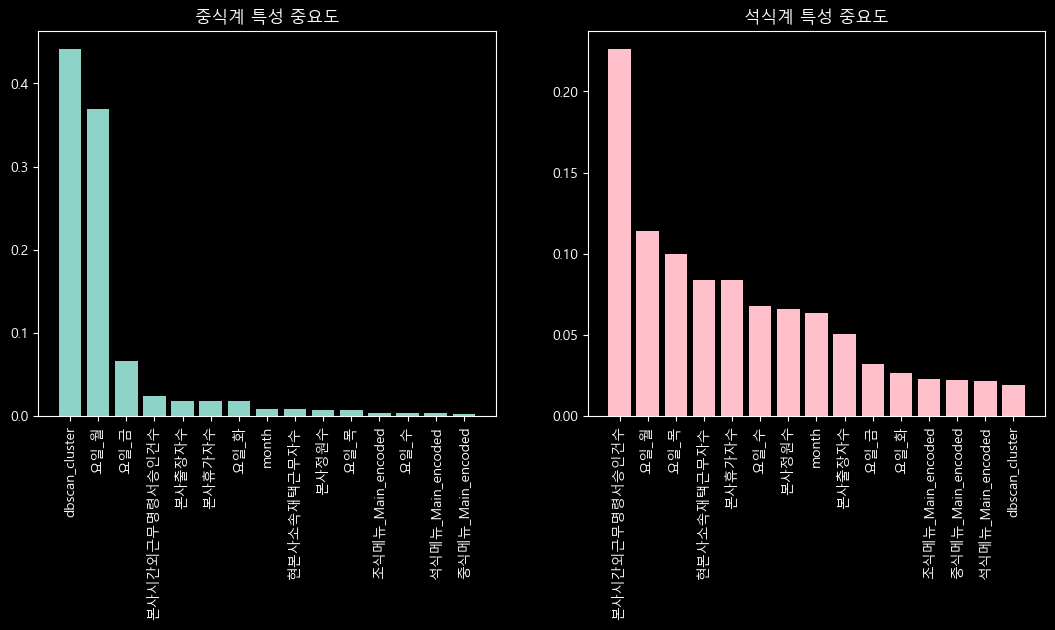

In [574]:
# 특성 중요도를 시각화해서 관측
fig, axes = plt.subplots(1, 2, figsize = (13, 5))   
# subplot(행, 열, 순번) : 해당 영역에 그리면서 진행
# subplots(행, 열) : 해당 영역을 먼저 생성

fi = model_lunch.feature_importances_   # 인덱스 재료로 사용할 특성 중요도 원본
fi_index = np.argsort(model_lunch.feature_importances_)[::-1]   # 특성 중요도 인덱스
axes[0].bar(range(len(fi)), fi[fi_index])   # 0,0에 바 차트 그리는 재료 - 바 차트 범위(len), 특성중요도(fi)에 접근해서 인덱스 넣어주기
axes[0].set_xticks(range(len(fi)))   # xticts의 자리 만들기
axes[0].set_xticklabels(X.columns[fi_index], rotation = 90)   # xticks의 이름 설정
axes[0].set_title("중식계 특성 중요도")

fi = model_dinner.feature_importances_ 
fi_index = np.argsort(model_dinner.feature_importances_)[::-1]
axes[1].bar(range(len(fi)), fi[fi_index], color = 'pink')
axes[1].set_xticks(range(len(fi)))   
axes[1].set_xticklabels(X.columns[fi_index], rotation = 90)
axes[1].set_title("석식계 특성 중요도")

plt.show()

# 중식계에 가장 영향을 많이 주는 특성은 dbscan_cluster => 클러스터 별로 중식계의 패턴이 다름을 나타냄
# 석식계에 가장 영향을 많이 주는 특성은 시간 외 근무명령서 승인 건수 => 시간 외 근무가 많을 때 석식 수요가 증가됨을 나타냄

#### **중식계 재고 관리 전략**
1. dbscan cluster
   - 각 클러스터 별로 중식 수요 패턴이 다름
   - 클러스터에 따라(요일별로) 재고를 달리 준비 => 요일 별로 군집됨을 확인
   - 중식 수요가 많은 클러스터는 더 많은 재고를 준비
2. 요일_월
    - 중식 수요가 높음 => 월요일에는 항상 추가 중식 재고를 준비해야 함
---
#### **석식계 재고 관리 전략**
1. 시간 외 승인 건수(본사시간외근무명령서승인건수)
   - 시간 외 근무가 많은 날에는 석식 수요가 증가됨을 확인
   - 승인 건수가 많은 날 일수록 추가적인 석식 재고를 준비할 수 있음
2. 요일별
   - 석식 수요가 높은 요일은 월 -> 목 -> 수 였음
   - 해당 요일에는 추가적인 석식 재고를 준비해 볼 필요가 있어보임